In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment Analysis provided by Upasana - Tweets need to be cleaned prior to using.**


In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Read in list of users to analyze**

In [5]:
df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers.csv")
# temp2D = pd.read_csv(, low_memory=False)

# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Users'])

In [7]:
# UserList.remove('Use2020Vision')
# UserList.remove('fairNtrue')
# print(UserList[0])
# len(UserList)
for user in UserList:
    if user == 'realDonaldTrump':
        print('FOUND')

In [7]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)

In [8]:
# temp_user_db.head()

In [9]:
iraContactPoints = pd.read_csv('contact_IRAtoUser_Inf_RESPONSIVE.csv')
# iraContactPoints.head()

**Create dict of contact points, formatted: username -> [list of contact points]**

In [10]:
iraContactDict = {}
for i in range(len(iraContactPoints)):
    
    temp_list = iraContactPoints['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints['username'][i]] = temp_list


In [11]:
for key in iraContactDict:
    temp_list = iraContactDict[key]
    temp_list.sort()


In [12]:
# for key in iraContactDict:
#     print(key)
#     print(iraContactDict[key])
#     print("\n\n")

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**


In [13]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [14]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Create new DataFrame, which will hold all before / after analysis date in the form of lists**

In [15]:
beforeAfterDF = pd.DataFrame(columns=['username', 'first_contact', 'second_contact',
                                      'third_contact','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [16]:
befAftCounts = pd.DataFrame(columns=['username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
                                    'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
                                    'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
                                    'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
                                    'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
                                    'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
                                    'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
                                    'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
                                    'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
                                    'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
                                    'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
                                    'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
                                    'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
                                    'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
                                    'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
                                    'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'
                                    ])

In [17]:
first_tweet_dict = {}
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(10):
    try:
        #create temp DF
        temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)
        #save first tweet date
        first_tweet_date = temp_user_db[3][len(temp_user_db)-1]
        first_tweet_dict[UserList[i]] = first_tweet_date
        #initialize values
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        
        username = UserList[i]
        contact_list = iraContactDict[username]
        first_contact = contact_list[0][:-6]
        first_contact = dt.strptime(first_contact, "%Y-%m-%d")
        second_contact = None
        third_contact = None
        if(len(contact_list) >= 2):
            second_contact = contact_list[1][:-6]
            second_contact = dt.strptime(second_contact, "%Y-%m-%d")
        if(len(contact_list) >= 3):
            third_contact = contact_list[2][:-6]
            third_contact = dt.strptime(third_contact, "%Y-%m-%d")
        #iterate through all tweets
        for j in range(len(temp_user_db)):
            #year one check
            current_date = temp_user_db[3][j]
            current_date = dt.strptime(current_date, "%Y-%m-%d")
            difference = ((((current_date - first_contact).total_seconds())/60)/60)/24
            if(difference >= -372 and difference <= 372):
                temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference < 0):
                    if (difference <= -341 and difference > -372): #-12
                        tweet_count[0] +=1
                        if trump_flag: trump_count[0] += 1
                        if clinton_flag: clinton_count[0] += 1
                        sentiment_scores[0].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[0].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[0].append(temp_sent)
                        if temp_sent > 0: positive_sent[0].append(temp_sent)
                        if temp_sent < 0: negative_sent[0].append(temp_sent)
                    elif (difference <= -310 and difference > -341): #-11
                        tweet_count[1] +=1
                        if trump_flag: trump_count[1] += 1
                        if clinton_flag: clinton_count[1] += 1
                        sentiment_scores[1].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[1].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[1].append(temp_sent)
                        if temp_sent > 0: positive_sent[1].append(temp_sent)
                        if temp_sent < 0: negative_sent[1].append(temp_sent)
                    elif (difference <= -279 and difference > -310): #-10
                        tweet_count[2] +=1
                        if trump_flag: trump_count[2] += 1
                        if clinton_flag: clinton_count[2] += 1
                        sentiment_scores[2].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[2].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[2].append(temp_sent)
                        if temp_sent > 0: positive_sent[2].append(temp_sent)
                        if temp_sent < 0: negative_sent[2].append(temp_sent)
                    elif (difference <= -248 and difference > -279): #-9
                        tweet_count[3] +=1
                        if trump_flag: trump_count[3] += 1
                        if clinton_flag: clinton_count[3] += 1
                        sentiment_scores[3].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[3].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[3].append(temp_sent)
                        if temp_sent > 0: positive_sent[3].append(temp_sent)
                        if temp_sent < 0: negative_sent[3].append(temp_sent)
                    elif (difference <= -217 and difference > -248): #-8
                        tweet_count[4] +=1
                        if trump_flag: trump_count[4] += 1
                        if clinton_flag: clinton_count[4] += 1
                        sentiment_scores[4].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[4].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[4].append(temp_sent)
                        if temp_sent > 0: positive_sent[4].append(temp_sent)
                        if temp_sent < 0: negative_sent[4].append(temp_sent)
                    elif (difference <= -186 and difference > -217): #-7
                        tweet_count[5] +=1
                        if trump_flag: trump_count[5] += 1
                        if clinton_flag: clinton_count[5] += 1
                        sentiment_scores[5].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[5].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[5].append(temp_sent)
                        if temp_sent > 0: positive_sent[5].append(temp_sent)
                        if temp_sent < 0: negative_sent[5].append(temp_sent)    
                    elif (difference <= -155 and difference > -186): #-6
                        tweet_count[6] +=1
                        if trump_flag: trump_count[6] += 1
                        if clinton_flag: clinton_count[6] += 1
                        sentiment_scores[6].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[6].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[6].append(temp_sent)
                        if temp_sent > 0: positive_sent[6].append(temp_sent)
                        if temp_sent < 0: negative_sent[6].append(temp_sent)
                    elif (difference <= -124 and difference > -155): #-5
                        tweet_count[7] +=1
                        if trump_flag: trump_count[7] += 1
                        if clinton_flag: clinton_count[7] += 1
                        sentiment_scores[7].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[7].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[7].append(temp_sent)
                        if temp_sent > 0: positive_sent[7].append(temp_sent)
                        if temp_sent < 0: negative_sent[7].append(temp_sent)
                    elif (difference <= -93 and difference > -124): #-4
                        tweet_count[8] +=1
                        if trump_flag: trump_count[8] += 1
                        if clinton_flag: clinton_count[8] += 1
                        sentiment_scores[8].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[8].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[8].append(temp_sent)
                        if temp_sent > 0: positive_sent[8].append(temp_sent)
                        if temp_sent < 0: negative_sent[8].append(temp_sent)
                    elif (difference <= -62 and difference > -93): #-3
                        tweet_count[9] +=1
                        if trump_flag: trump_count[9] += 1
                        if clinton_flag: clinton_count[9] += 1
                        sentiment_scores[9].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[9].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[9].append(temp_sent)
                        if temp_sent > 0: positive_sent[9].append(temp_sent)
                        if temp_sent < 0: negative_sent[9].append(temp_sent)
                    elif (difference <= -31 and difference > -62): #-2
                        tweet_count[10] +=1
                        if trump_flag: trump_count[10] += 1
                        if clinton_flag: clinton_count[10] += 1
                        sentiment_scores[10].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[10].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[10].append(temp_sent)
                        if temp_sent > 0: positive_sent[10].append(temp_sent)
                        if temp_sent < 0: negative_sent[10].append(temp_sent)
                    elif (difference <= 0 and difference > -31): #-1
                        tweet_count[11] +=1
                        if trump_flag: trump_count[11] += 1
                        if clinton_flag: clinton_count[11] += 1
                        sentiment_scores[11].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[11].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[11].append(temp_sent)
                        if temp_sent > 0: positive_sent[11].append(temp_sent)
                        if temp_sent < 0: negative_sent[11].append(temp_sent)
                if(difference >= 0):
                    if (difference >= 0 and difference < 31): #1 
                        tweet_count[12] +=1
                        if trump_flag: trump_count[12] += 1
                        if clinton_flag: clinton_count[12] += 1
                        sentiment_scores[12].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[12].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[12].append(temp_sent)
                        if temp_sent > 0: positive_sent[12].append(temp_sent)
                        if temp_sent < 0: negative_sent[12].append(temp_sent)
                    elif (difference >= 31 and difference < 62): #2 
                        tweet_count[13] +=1
                        if trump_flag: trump_count[13] += 1
                        if clinton_flag: clinton_count[13] += 1
                        sentiment_scores[13].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[13].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[13].append(temp_sent)
                        if temp_sent > 0: positive_sent[13].append(temp_sent)
                        if temp_sent < 0: negative_sent[13].append(temp_sent)
                    elif (difference >= 62 and difference < 93): #3
                        tweet_count[14] +=1
                        if trump_flag: trump_count[14] += 1
                        if clinton_flag: clinton_count[14] += 1
                        sentiment_scores[14].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[14].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[14].append(temp_sent)
                        if temp_sent > 0: positive_sent[14].append(temp_sent)
                        if temp_sent < 0: negative_sent[14].append(temp_sent)
                    elif (difference >= 93 and difference < 124): #4
                        tweet_count[15] +=1
                        if trump_flag: trump_count[15] += 1
                        if clinton_flag: clinton_count[15] += 1
                        sentiment_scores[15].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[15].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[15].append(temp_sent)
                        if temp_sent > 0: positive_sent[15].append(temp_sent)
                        if temp_sent < 0: negative_sent[15].append(temp_sent)
                    elif (difference >= 124 and difference < 155): #5
                        tweet_count[16] +=1
                        if trump_flag: trump_count[16] += 1
                        if clinton_flag: clinton_count[16] += 1
                        sentiment_scores[16].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[16].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[16].append(temp_sent)
                        if temp_sent > 0: positive_sent[16].append(temp_sent)
                        if temp_sent < 0: negative_sent[16].append(temp_sent)
                    elif (difference >= 155 and difference < 186): #6
                        tweet_count[17] +=1
                        if trump_flag: trump_count[17] += 1
                        if clinton_flag: clinton_count[17] += 1
                        sentiment_scores[17].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[17].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[17].append(temp_sent)
                        if temp_sent > 0: positive_sent[17].append(temp_sent)
                        if temp_sent < 0: negative_sent[17].append(temp_sent)
                    elif (difference >= 186 and difference < 217): #7
                        tweet_count[18] +=1
                        if trump_flag: trump_count[18] += 1
                        if clinton_flag: clinton_count[18] += 1
                        sentiment_scores[18].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[18].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[18].append(temp_sent)
                        if temp_sent > 0: positive_sent[18].append(temp_sent)
                        if temp_sent < 0: negative_sent[18].append(temp_sent)
                    elif (difference >= 217 and difference < 248): #8
                        tweet_count[19] += 1
                        if trump_flag: trump_count[19] += 1
                        if clinton_flag: clinton_count[19] += 1
                        sentiment_scores[19].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[19].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[19].append(temp_sent)
                        if temp_sent > 0: positive_sent[19].append(temp_sent)
                        if temp_sent < 0: negative_sent[19].append(temp_sent)
                    elif (difference >= 248 and difference < 279): #9
                        tweet_count[20] +=1
                        if trump_flag: trump_count[20] += 1
                        if clinton_flag: clinton_count[20] += 1
                        sentiment_scores[20].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[20].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[20].append(temp_sent)
                        if temp_sent > 0: positive_sent[20].append(temp_sent)
                        if temp_sent < 0: negative_sent[20].append(temp_sent)
                    elif (difference >= 279 and difference < 310): #10
                        tweet_count[21] +=1
                        if trump_flag: trump_count[21] += 1
                        if clinton_flag: clinton_count[21] += 1
                        sentiment_scores[21].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[21].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[21].append(temp_sent)
                        if temp_sent > 0: positive_sent[21].append(temp_sent)
                        if temp_sent < 0: negative_sent[21].append(temp_sent)
                    elif (difference >= 310 and difference < 341): #11 
                        tweet_count[22] +=1
                        if trump_flag: trump_count[22] += 1
                        if clinton_flag: clinton_count[22] += 1
                        sentiment_scores[22].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[22].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[22].append(temp_sent)
                        if temp_sent > 0: positive_sent[22].append(temp_sent)
                        if temp_sent < 0: negative_sent[22].append(temp_sent)
                    elif (difference >= 341 and difference < 372): #12  
                        tweet_count[23] +=1
                        if trump_flag: trump_count[23] += 1
                        if clinton_flag: clinton_count[23] += 1
                        sentiment_scores[23].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[23].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[23].append(temp_sent)
                        if temp_sent > 0: positive_sent[23].append(temp_sent)
                        if temp_sent < 0: negative_sent[23].append(temp_sent)
            #year two check
            if(second_contact != None):
                difference = ((((current_date - second_contact).total_seconds())/60)/60)/24
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[24] +=1
                            if trump_flag: trump_count[24] += 1
                            if clinton_flag: clinton_count[24] += 1
                            sentiment_scores[24].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[24].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[24].append(temp_sent)
                            if temp_sent > 0: positive_sent[24].append(temp_sent)
                            if temp_sent < 0: negative_sent[24].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[25] +=1
                            if trump_flag: trump_count[25] += 1
                            if clinton_flag: clinton_count[25] += 1
                            sentiment_scores[25].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[25].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[25].append(temp_sent)
                            if temp_sent > 0: positive_sent[25].append(temp_sent)
                            if temp_sent < 0: negative_sent[25].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[26] +=1
                            if trump_flag: trump_count[26] += 1
                            if clinton_flag: clinton_count[26] += 1
                            sentiment_scores[26].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[26].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[26].append(temp_sent)
                            if temp_sent > 0: positive_sent[26].append(temp_sent)
                            if temp_sent < 0: negative_sent[26].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[27] +=1
                            if trump_flag: trump_count[27] += 1
                            if clinton_flag: clinton_count[27] += 1
                            sentiment_scores[27].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[27].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[27].append(temp_sent)
                            if temp_sent > 0: positive_sent[27].append(temp_sent)
                            if temp_sent < 0: negative_sent[27].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[28] +=1
                            if trump_flag: trump_count[28] += 1
                            if clinton_flag: clinton_count[28] += 1
                            sentiment_scores[28].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[28].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[28].append(temp_sent)
                            if temp_sent > 0: positive_sent[28].append(temp_sent)
                            if temp_sent < 0: negative_sent[28].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[29] +=1
                            if trump_flag: trump_count[29] += 1
                            if clinton_flag: clinton_count[29] += 1
                            sentiment_scores[29].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[29].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[29].append(temp_sent)
                            if temp_sent > 0: positive_sent[29].append(temp_sent)
                            if temp_sent < 0: negative_sent[29].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[30] +=1
                            if trump_flag: trump_count[30] += 1
                            if clinton_flag: clinton_count[30] += 1
                            sentiment_scores[30].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[30].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[30].append(temp_sent)
                            if temp_sent > 0: positive_sent[30].append(temp_sent)
                            if temp_sent < 0: negative_sent[30].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[31] +=1
                            if trump_flag: trump_count[31] += 1
                            if clinton_flag: clinton_count[31] += 1
                            sentiment_scores[31].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[31].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[31].append(temp_sent)
                            if temp_sent > 0: positive_sent[31].append(temp_sent)
                            if temp_sent < 0: negative_sent[31].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[32] +=1
                            if trump_flag: trump_count[32] += 1
                            if clinton_flag: clinton_count[32] += 1
                            sentiment_scores[32].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[32].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[32].append(temp_sent)
                            if temp_sent > 0: positive_sent[32].append(temp_sent)
                            if temp_sent < 0: negative_sent[32].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[33] +=1
                            if trump_flag: trump_count[33] += 1
                            if clinton_flag: clinton_count[33] += 1
                            sentiment_scores[33].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[33].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[33].append(temp_sent)
                            if temp_sent > 0: positive_sent[33].append(temp_sent)
                            if temp_sent < 0: negative_sent[33].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[34] +=1
                            if trump_flag: trump_count[34] += 1
                            if clinton_flag: clinton_count[34] += 1
                            sentiment_scores[34].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[34].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[34].append(temp_sent)
                            if temp_sent > 0: positive_sent[34].append(temp_sent)
                            if temp_sent < 0: negative_sent[34].append(temp_sent)
                        elif (difference <= 0 and difference > -31): #-1
                            tweet_count[35] +=1
                            if trump_flag: trump_count[35] += 1
                            if clinton_flag: clinton_count[35] += 1
                            sentiment_scores[35].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[35].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[35].append(temp_sent)
                            if temp_sent > 0: positive_sent[35].append(temp_sent)
                            if temp_sent < 0: negative_sent[35].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[36] +=1
                            if trump_flag: trump_count[36] += 1
                            if clinton_flag: clinton_count[36] += 1
                            sentiment_scores[36].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[36].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[36].append(temp_sent)
                            if temp_sent > 0: positive_sent[36].append(temp_sent)
                            if temp_sent < 0: negative_sent[36].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[37] +=1
                            if trump_flag: trump_count[37] += 1
                            if clinton_flag: clinton_count[37] += 1
                            sentiment_scores[37].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[37].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[37].append(temp_sent)
                            if temp_sent > 0: positive_sent[37].append(temp_sent)
                            if temp_sent < 0: negative_sent[37].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[38] +=1
                            if trump_flag: trump_count[38] += 1
                            if clinton_flag: clinton_count[38] += 1
                            sentiment_scores[38].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[38].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[38].append(temp_sent)
                            if temp_sent > 0: positive_sent[38].append(temp_sent)
                            if temp_sent < 0: negative_sent[38].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[39] +=1
                            if trump_flag: trump_count[39] += 1
                            if clinton_flag: clinton_count[39] += 1
                            sentiment_scores[39].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[39].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[39].append(temp_sent)
                            if temp_sent > 0: positive_sent[39].append(temp_sent)
                            if temp_sent < 0: negative_sent[39].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[40] +=1
                            if trump_flag: trump_count[40] += 1
                            if clinton_flag: clinton_count[40] += 1
                            sentiment_scores[40].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[40].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[40].append(temp_sent)
                            if temp_sent > 0: positive_sent[40].append(temp_sent)
                            if temp_sent < 0: negative_sent[40].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[41] +=1
                            if trump_flag: trump_count[41] += 1
                            if clinton_flag: clinton_count[41] += 1
                            sentiment_scores[41].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[41].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[41].append(temp_sent)
                            if temp_sent > 0: positive_sent[41].append(temp_sent)
                            if temp_sent < 0: negative_sent[41].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[42] +=1
                            if trump_flag: trump_count[42] += 1
                            if clinton_flag: clinton_count[42] += 1
                            sentiment_scores[42].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[42].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[42].append(temp_sent)
                            if temp_sent > 0: positive_sent[42].append(temp_sent)
                            if temp_sent < 0: negative_sent[42].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[43] += 1
                            if trump_flag: trump_count[43] += 1
                            if clinton_flag: clinton_count[43] += 1
                            sentiment_scores[43].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[43].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[43].append(temp_sent)
                            if temp_sent > 0: positive_sent[43].append(temp_sent)
                            if temp_sent < 0: negative_sent[43].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[44] +=1
                            if trump_flag: trump_count[44] += 1
                            if clinton_flag: clinton_count[44] += 1
                            sentiment_scores[44].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[44].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[44].append(temp_sent)
                            if temp_sent > 0: positive_sent[44].append(temp_sent)
                            if temp_sent < 0: negative_sent[44].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[45] +=1
                            if trump_flag: trump_count[45] += 1
                            if clinton_flag: clinton_count[45] += 1
                            sentiment_scores[45].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[45].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[45].append(temp_sent)
                            if temp_sent > 0: positive_sent[45].append(temp_sent)
                            if temp_sent < 0: negative_sent[45].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[46] +=1
                            if trump_flag: trump_count[46] += 1
                            if clinton_flag: clinton_count[46] += 1
                            sentiment_scores[46].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[46].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[46].append(temp_sent)
                            if temp_sent > 0: positive_sent[46].append(temp_sent)
                            if temp_sent < 0: negative_sent[46].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[47] +=1
                            if trump_flag: trump_count[47] += 1
                            if clinton_flag: clinton_count[47] += 1
                            sentiment_scores[47].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[47].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[47].append(temp_sent)
                            if temp_sent > 0: positive_sent[47].append(temp_sent)
                            if temp_sent < 0: negative_sent[47].append(temp_sent)
            #year three check
            if(third_contact != None):
                difference = ((((current_date - third_contact).total_seconds())/60)/60)/24
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[48] +=1
                            if trump_flag: trump_count[48] += 1
                            if clinton_flag: clinton_count[48] += 1
                            sentiment_scores[48].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[48].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[48].append(temp_sent)
                            if temp_sent > 0: positive_sent[48].append(temp_sent)
                            if temp_sent < 0: negative_sent[48].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[49] +=1
                            if trump_flag: trump_count[49] += 1
                            if clinton_flag: clinton_count[49] += 1
                            sentiment_scores[49].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[49].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[49].append(temp_sent)
                            if temp_sent > 0: positive_sent[49].append(temp_sent)
                            if temp_sent < 0: negative_sent[49].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[50] +=1
                            if trump_flag: trump_count[50] += 1
                            if clinton_flag: clinton_count[50] += 1
                            sentiment_scores[50].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[50].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[50].append(temp_sent)
                            if temp_sent > 0: positive_sent[50].append(temp_sent)
                            if temp_sent < 0: negative_sent[50].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[51] +=1
                            if trump_flag: trump_count[51] += 1
                            if clinton_flag: clinton_count[51] += 1
                            sentiment_scores[51].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[51].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[51].append(temp_sent)
                            if temp_sent > 0: positive_sent[51].append(temp_sent)
                            if temp_sent < 0: negative_sent[51].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[52] +=1
                            if trump_flag: trump_count[52] += 1
                            if clinton_flag: clinton_count[52] += 1
                            sentiment_scores[52].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[52].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[52].append(temp_sent)
                            if temp_sent > 0: positive_sent[52].append(temp_sent)
                            if temp_sent < 0: negative_sent[52].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[53] +=1
                            if trump_flag: trump_count[53] += 1
                            if clinton_flag: clinton_count[53] += 1
                            sentiment_scores[53].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[53].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[53].append(temp_sent)
                            if temp_sent > 0: positive_sent[53].append(temp_sent)
                            if temp_sent < 0: negative_sent[53].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[54] +=1
                            if trump_flag: trump_count[54] += 1
                            if clinton_flag: clinton_count[54] += 1
                            sentiment_scores[54].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[54].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[54].append(temp_sent)
                            if temp_sent > 0: positive_sent[54].append(temp_sent)
                            if temp_sent < 0: negative_sent[54].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[55] +=1
                            if trump_flag: trump_count[55] += 1
                            if clinton_flag: clinton_count[55] += 1
                            sentiment_scores[55].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[55].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[55].append(temp_sent)
                            if temp_sent > 0: positive_sent[55].append(temp_sent)
                            if temp_sent < 0: negative_sent[55].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[56] +=1
                            if trump_flag: trump_count[56] += 1
                            if clinton_flag: clinton_count[56] += 1
                            sentiment_scores[56].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[56].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[56].append(temp_sent)
                            if temp_sent > 0: positive_sent[56].append(temp_sent)
                            if temp_sent < 0: negative_sent[56].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[57] +=1
                            if trump_flag: trump_count[57] += 1
                            if clinton_flag: clinton_count[57] += 1
                            sentiment_scores[57].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[57].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[57].append(temp_sent)
                            if temp_sent > 0: positive_sent[57].append(temp_sent)
                            if temp_sent < 0: negative_sent[57].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[58] +=1
                            if trump_flag: trump_count[58] += 1
                            if clinton_flag: clinton_count[58] += 1
                            sentiment_scores[58].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[58].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[58].append(temp_sent)
                            if temp_sent > 0: positive_sent[58].append(temp_sent)
                            if temp_sent < 0: negative_sent[58].append(temp_sent)
                        elif (difference < 0 and difference > -31): #-1
                            tweet_count[59] +=1
                            if trump_flag: trump_count[59] += 1
                            if clinton_flag: clinton_count[59] += 1
                            sentiment_scores[59].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[59].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[59].append(temp_sent)
                            if temp_sent > 0: positive_sent[59].append(temp_sent)
                            if temp_sent < 0: negative_sent[59].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[60] +=1
                            if trump_flag: trump_count[60] += 1
                            if clinton_flag: clinton_count[60] += 1
                            sentiment_scores[60].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[60].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[60].append(temp_sent)
                            if temp_sent > 0: positive_sent[60].append(temp_sent)
                            if temp_sent < 0: negative_sent[60].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[61] +=1
                            if trump_flag: trump_count[61] += 1
                            if clinton_flag: clinton_count[61] += 1
                            sentiment_scores[61].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[61].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[61].append(temp_sent)
                            if temp_sent > 0: positive_sent[61].append(temp_sent)
                            if temp_sent < 0: negative_sent[61].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[62] +=1
                            if trump_flag: trump_count[62] += 1
                            if clinton_flag: clinton_count[62] += 1
                            sentiment_scores[62].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[62].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[62].append(temp_sent)
                            if temp_sent > 0: positive_sent[62].append(temp_sent)
                            if temp_sent < 0: negative_sent[62].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[63] +=1
                            if trump_flag: trump_count[63] += 1
                            if clinton_flag: clinton_count[63] += 1
                            sentiment_scores[63].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[63].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[63].append(temp_sent)
                            if temp_sent > 0: positive_sent[63].append(temp_sent)
                            if temp_sent < 0: negative_sent[63].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[64] +=1
                            if trump_flag: trump_count[64] += 1
                            if clinton_flag: clinton_count[64] += 1
                            sentiment_scores[64].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[64].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[64].append(temp_sent)
                            if temp_sent > 0: positive_sent[64].append(temp_sent)
                            if temp_sent < 0: negative_sent[64].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[65] +=1
                            if trump_flag: trump_count[65] += 1
                            if clinton_flag: clinton_count[65] += 1
                            sentiment_scores[65].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[65].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[65].append(temp_sent)
                            if temp_sent > 0: positive_sent[65].append(temp_sent)
                            if temp_sent < 0: negative_sent[65].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[66] +=1
                            if trump_flag: trump_count[66] += 1
                            if clinton_flag: clinton_count[66] += 1
                            sentiment_scores[66].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[66].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[66].append(temp_sent)
                            if temp_sent > 0: positive_sent[66].append(temp_sent)
                            if temp_sent < 0: negative_sent[66].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[67] += 1
                            if trump_flag: trump_count[67] += 1
                            if clinton_flag: clinton_count[67] += 1
                            sentiment_scores[67].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[67].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[67].append(temp_sent)
                            if temp_sent > 0: positive_sent[67].append(temp_sent)
                            if temp_sent < 0: negative_sent[67].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[68] +=1
                            if trump_flag: trump_count[68] += 1
                            if clinton_flag: clinton_count[68] += 1
                            sentiment_scores[68].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[68].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[68].append(temp_sent)
                            if temp_sent > 0: positive_sent[68].append(temp_sent)
                            if temp_sent < 0: negative_sent[68].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[69] +=1
                            if trump_flag: trump_count[69] += 1
                            if clinton_flag: clinton_count[69] += 1
                            sentiment_scores[69].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[69].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[69].append(temp_sent)
                            if temp_sent > 0: positive_sent[69].append(temp_sent)
                            if temp_sent < 0: negative_sent[69].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[70] +=1
                            if trump_flag: trump_count[70] += 1
                            if clinton_flag: clinton_count[70] += 1
                            sentiment_scores[70].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[70].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[70].append(temp_sent)
                            if temp_sent > 0: positive_sent[70].append(temp_sent)
                            if temp_sent < 0: negative_sent[70].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[71] +=1
                            if trump_flag: trump_count[71] += 1
                            if clinton_flag: clinton_count[71] += 1
                            sentiment_scores[71].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[71].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[71].append(temp_sent)
                            if temp_sent > 0: positive_sent[71].append(temp_sent)
                            if temp_sent < 0: negative_sent[71].append(temp_sent)
        
        before_sentyear1 = []
        before_sentyear2 = []
        before_sentyear3 = []
        after_sentyear1 = []
        after_sentyear2 = []
        after_sentyear3 = []
        before_trump_sentyear1 = []
        before_trump_sentyear2 = []
        before_trump_sentyear3 = []
        after_trump_sentyear1 = []
        after_trump_sentyear2 = []
        after_trump_sentyear3 = []
        before_clinton_sentyear1 = []
        before_clinton_sentyear2 = []
        before_clinton_sentyear3 = []
        after_clinton_sentyear1 = []
        after_clinton_sentyear2 = []
        after_clinton_sentyear3 = []
        before_tweet1 = 0
        before_tweet2 = 0
        before_tweet3 = 0
        after_tweet1 = 0
        after_tweet2 = 0
        after_tweet3 = 0
        before_trump1 = 0
        before_trump2 = 0
        before_trump3 = 0
        after_trump1 = 0
        after_trump2 = 0
        after_trump3 = 0
        before_clinton1 = 0
        before_clinton2 = 0
        before_clinton3 = 0
        after_clinton1 = 0
        after_clinton2 = 0
        after_clinton3 = 0
        before_positive1 = []
        before_positive2 = []
        before_positive3 = []
        after_positive1 = []
        after_positive2 = []
        after_positive3 = []
        before_negative1 = []
        before_negative2 = []
        before_negative3 = []
        after_negative1 = []
        after_negative2 = []
        after_negative3 = []
        
        for q in range(9,12):
            before_tweet1 += tweet_count[q]
            before_trump1 += trump_count[q]
            before_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative1.append(negative_sent[q][j])
                    
        for q in range(12,15):
            after_tweet1 += tweet_count[q]
            after_trump1 += trump_count[q]
            after_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative1.append(negative_sent[q][j])
                    
                    
        for q in range(33,36):
            before_tweet2 += tweet_count[q]
            before_trump2 += trump_count[q]
            before_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative2.append(negative_sent[q][j])
                    
        for q in range(36,39):
            after_tweet2 += tweet_count[q]
            after_trump2 += trump_count[q]
            after_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative2.append(negative_sent[q][j])
                    
        for q in range(57,60):
            before_tweet3 += tweet_count[q]
            before_trump3 += trump_count[q]
            before_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative3.append(negative_sent[q][j])
                    
        for q in range(60,63):
            after_tweet3 += tweet_count[q]
            after_trump3 += trump_count[q]
            after_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative3.append(negative_sent[q][j])
            
            if(len(before_sentyear1)) == 0:
                before_sentyear1.append(0)
            if(len(before_sentyear2)) == 0:
                before_sentyear2.append(0)
            if(len(before_sentyear3)) == 0:
                before_sentyear3.append(0)
            if(len(after_sentyear1)) == 0:
                after_sentyear1.append(0)
            if(len(after_sentyear2)) == 0:
                after_sentyear2.append(0)
            if(len(after_sentyear3)) == 0:
                after_sentyear3.append(0)
            if(len(before_trump_sentyear1) == 0):
                before_trump_sentyear1.append(0)
            if(len(before_trump_sentyear2) == 0):
                before_trump_sentyear2.append(0)
            if(len(before_trump_sentyear3) == 0):
                before_trump_sentyear3.append(0)
            if(len(after_trump_sentyear1) == 0):
                after_trump_sentyear1.append(0)
            if(len(after_trump_sentyear2) == 0):
                after_trump_sentyear2.append(0)
            if(len(after_trump_sentyear3) == 0):
                after_trump_sentyear3.append(0)
            if(len(before_clinton_sentyear1) == 0):
                before_clinton_sentyear1.append(0)
            if(len(before_clinton_sentyear2) == 0):
                before_clinton_sentyear2.append(0)
            if(len(before_clinton_sentyear3) == 0):
                before_clinton_sentyear3.append(0)
            if(len(after_clinton_sentyear1) == 0):
                after_clinton_sentyear1.append(0)
            if(len(after_clinton_sentyear2) == 0):
                after_clinton_sentyear2.append(0)
            if(len(after_clinton_sentyear3) == 0):
                after_clinton_sentyear3.append(0)
            if(len(before_positive1) == 0):
                before_positive1.append(0)
            if(len(before_positive2) == 0):
                before_positive2.append(0)
            if(len(before_positive3) == 0):
                before_positive3.append(0)
            if(len(after_positive1) == 0):
                after_positive1.append(0)
            if(len(after_positive2) == 0):
                after_positive2.append(0)
            if(len(after_positive3) == 0):
                after_positive3.append(0)
            if(len(before_negative1) == 0):
                before_negative1.append(0)
            if(len(before_negative2) == 0):
                before_negative2.append(0)
            if(len(before_negative3) == 0):
                before_negative3.append(0)
            if(len(after_negative1) == 0):
                after_negative1.append(0)
            if(len(after_negative2) == 0):
                after_negative2.append(0)
            if(len(after_negative3) == 0):
                after_negative3.append(0)
                
        befAftCounts = befAftCounts.append({
            'username' : username, 
            'before_tweetcount1' : before_tweet1, 'before_tweetcount2' : before_tweet2, 'before_tweetcount3' : before_tweet3,
            'after_tweetcount1' : after_tweet1, 'after_tweetcount2' : after_tweet2, 'after_tweetcount3' : after_tweet3,
            'before_trumpcount1' : before_trump1, 'before_trumpcount2' : before_trump2, 'before_trumpcount3' : before_trump3,
            'after_trumpcount1' : after_trump1, 'after_trumpcount2' : after_trump2, 'after_trumpcount3' : after_trump3,
            'before_clintoncount1' : before_clinton1, 'before_clintoncount2' : before_clinton2, 'before_clintoncount3' : before_clinton3,
            'after_clintoncount1' : after_clinton1, 'after_clintoncount2' : after_clinton2, 'after_clintoncount3' : after_clinton3,
            'before_sentiment1' : statistics.mean(before_sentyear1), 
            'before_sentiment2' : statistics.mean(before_sentyear2), 
            'before_sentiment3' : statistics.mean(before_sentyear3),
            'after_sentiment1' : statistics.mean(after_sentyear1), 
            'after_sentiment2' : statistics.mean(after_sentyear2), 
            'after_sentiment3' : statistics.mean(after_sentyear3),
            'before_trump_sent1' : statistics.mean(before_trump_sentyear1), 
            'before_trump_sent2' : statistics.mean(before_trump_sentyear2), 
            'before_trump_sent3' : statistics.mean(before_trump_sentyear3),
            'after_trump_sent1' : statistics.mean(after_trump_sentyear1), 
            'after_trump_sent2' : statistics.mean(after_trump_sentyear2), 
            'after_trump_sent3' : statistics.mean(after_trump_sentyear3),
            'before_clinton_sent1' : statistics.mean(before_clinton_sentyear1), 
            'before_clinton_sent2' : statistics.mean(before_clinton_sentyear2), 
            'before_clinton_sent3' : statistics.mean(before_clinton_sentyear3),
            'after_clinton_sent1' : statistics.mean(after_clinton_sentyear1), 
            'after_clinton_sent2' : statistics.mean(after_clinton_sentyear2), 
            'after_clinton_sent3' : statistics.mean(after_clinton_sentyear3),
            'before_positive_sent1' : statistics.mean(before_positive1),
            'before_positive_sent1' : statistics.mean(before_positive2),
            'before_positive_sent1' : statistics.mean(before_positive3),
            'after_positive_sent1' : statistics.mean(after_positive1),
            'after_positive_sent1' : statistics.mean(after_positive2),
            'after_positive_sent1' : statistics.mean(after_positive3),
            'before_negative_sent1' : statistics.mean(before_negative1),
            'before_negative_sent1' : statistics.mean(before_negative2),
            'before_negative_sent1' : statistics.mean(before_negative3),
            'after_negative_sent1' : statistics.mean(after_negative1),
            'after_negative_sent1' : statistics.mean(after_negative2),
            'after_negative_sent1' : statistics.mean(after_negative3)
        
    }, ignore_index = True)
        for k in range(len(sentiment_scores)):
            if(len(sentiment_scores[k]) > 0 ):
                sentiment_scores[k] = statistics.mean(sentiment_scores[k])
            else:
                sentiment_scores[k] = 0
                
        for k in range(len(trump_sent)):
            if(len(trump_sent[k]) > 0 ):
                trump_sent[k] = statistics.mean(trump_sent[k])
            else:
                trump_sent[k] = 0
                
        for k in range(len(clinton_sent)):
            if(len(clinton_sent[k]) > 0 ):
                clinton_sent[k] = statistics.mean(clinton_sent[k])
            else:
                clinton_sent[k] = 0
        for k in range(len(positive_sent)):
            if(len(positive_sent[k]) > 0 ):
                positive_sent[k] = statistics.mean(positive_sent[k])
            else:
                positive_sent[k] = 0
                
        for k in range(len(negative_sent)):
            if(len(negative_sent[k]) > 0 ):
                negative_sent[k] = statistics.mean(negative_sent[k])
            else:
                negative_sent[k] = 0
                
        beforeAfterDF = beforeAfterDF.append({
            'username' : username, 'first_contact' : first_contact, 'second_contact' : second_contact,
            'third_contact' : third_contact, 'tweet_count' : tweet_count, 'sentiment_scores' : sentiment_scores,
            'trump_count' : trump_count, 'clinton_count' : clinton_count, 'trump_sent' : trump_sent, 
            'clinton_sent' : clinton_sent, 'positive_sent' : positive_sent, 'negative_sent' : negative_sent
        }, ignore_index = True) 
        
        print(str(i+1)+" / " + size)
    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))


1 / 550
2 / 550
3 / 550
4 / 550
5 / 550
6 / 550
12 / 550
13 / 550
14 / 550
15 / 550
16 / 550
17 / 550
18 / 550
19 / 550
20 / 550
21 / 550
22 / 550
23 / 550
24 / 550
25 / 550
26 / 550
27 / 550
28 / 550
29 / 550
30 / 550
31 / 550
32 / 550
33 / 550
34 / 550
35 / 550
36 / 550
37 / 550
38 / 550
39 / 550
40 / 550
41 / 550
42 / 550
43 / 550
44 / 550
45 / 550
46 / 550
47 / 550
48 / 550
49 / 550
50 / 550
51 / 550
52 / 550
53 / 550
54 / 550
55 / 550
56 / 550
57 / 550
58 / 550
59 / 550
60 / 550
61 / 550
62 / 550
63 / 550
64 / 550
65 / 550
66 / 550
67 / 550
68 / 550
69 / 550
70 / 550
71 / 550
72 / 550
73 / 550
74 / 550
75 / 550
76 / 550
77 / 550
78 / 550
79 / 550
80 / 550
81 / 550
82 / 550
83 / 550
84 / 550
85 / 550
86 / 550
87 / 550
88 / 550
89 / 550
90 / 550
91 / 550
92 / 550
93 / 550
94 / 550
95 / 550
96 / 550
97 / 550
98 / 550
99 / 550
100 / 550
101 / 550
102 / 550
103 / 550
104 / 550
105 / 550
106 / 550
107 / 550
108 / 550
109 / 550
110 / 550
111 / 550
112 / 550
113 / 550
114 / 550
115 / 550


In [18]:
befAftCounts.to_csv('inf_responsive_05_18_20_3month.csv')
befAftCounts.to_pickle('inf_responsive_05_18_20_3month.pkl')

In [19]:
# befAftCounts.head()

**Create dictionary of users first tweet dates**

Format: { [username] : str(date) }

In [20]:
# first_tweet_dict = {}

**Iterate through users and perform before / after analysis**

**Save Data**

In [21]:
# beforeAfterDF.to_csv('beforeAfter_AllData_MentionBackedUsers.csv')
# beforeAfterDF.to_csv('BefAft_Infl_DidRespond/befAft_2D_Inf_05_05_2020.csv')
# beforeAfterDF.to_pickle('BefAft_Infl_DidRespond/befAft_2D_Inf_05_05_2020.pkl')
# original_df.to_pickle("./dummy.pkl")


beforeAfterDF.to_csv('BefAft_Infl_DidRespond/data_inf_responsive_05_18_20_3month.csv')
beforeAfterDF.to_pickle('BefAft_Infl_DidRespond/data_inf_responsive_05_18_20_3month.pkl')


In [22]:
pickle.dump(first_tweet_dict, open("IR_first.p", "wb"))

In [23]:
beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,real_vt16,2016-12-18,2017-02-18,2017-03-13 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 1184, 1576,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0130440000000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 30, 53, 36, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.20504, -0.005...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, -0.3537...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4621052631578...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.625215384615..."
1,angiekay500,2017-02-20,2017-04-03,2017-04-05 00:00:00,"[1, 46, 21, 179, 1091, 1159, 563, 486, 524, 43...","[0.0, -0.06153260869565218, -0.151652380952380...","[0, 8, 3, 16, 35, 95, 15, 23, 35, 21, 41, 14, ...","[0, 5, 0, 10, 80, 70, 14, 12, 26, 13, 25, 24, ...","[0, -0.010557142857142867, -0.1970666666666666...","[0, -0.224825, 0, -0.14778333333333332, -0.213...","[0, 0.5440214285714285, 0.48213333333333336, 0...","[0, -0.6145176470588235, -0.6752777777777778, ..."
2,AlisonSpalding2,2015-05-28,2015-05-28,2015-05-28 00:00:00,"[0, 0, 0, 0, 2640, 3450, 2503, 159, 1079, 4081...","[0, 0, 0, 0, -0.011805871212121212, 0.01629437...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 8, 2, ...","[0, 0, 0, 0, 0, 4, 9, 0, 0, 55, 125, 365, 136,...","[0, 0, 0, 0, 0.8074, 0, 0, 0, 0, -0.0365666666...","[0, 0, 0, 0, 0, 0.14497499999999997, -0.013422...","[0, 0, 0, 0, 0.4739573023255814, 0.47838619972...","[0, 0, 0, 0, -0.4827425, -0.4836773282442748, ..."
3,WhosFibbing,2016-01-21,2016-01-21,2016-05-05 00:00:00,"[840, 509, 450, 699, 597, 672, 444, 582, 636, ...","[0.02341535714285714, 0.003825540275049115, -0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 6, 5, 27, 5,...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -0.328333333333333...","[0, 0, -0.10015, 0, 0, 0, 0, 0, 0, 0, 0, 0.757...","[0.5086671974522293, 0.4958091891891892, 0.487...","[-0.5206416356877324, -0.5159626436781609, -0...."
4,wmmII88,2016-12-17,2017-02-07,2017-02-21 00:00:00,"[96, 164, 446, 109, 84, 16, 25, 45, 57, 136, 4...","[-0.24478645833333335, -0.020470121951219507, ...","[10, 37, 44, 9, 8, 2, 2, 6, 2, 11, 12, 10, 9, ...","[7, 8, 5, 5, 5, 4, 1, 12, 13, 38, 112, 3, 6, 3...","[-0.14883333333333335, -0.09789428571428571, -...","[-0.29355, -0.28856666666666664, -0.51936, -0....","[0.46321304347826087, 0.5156938461538462, 0.50...","[-0.5598918032786885, -0.5121833333333333, -0...."


**Now we need to break apart the dataframe in order to analyze each contact span + criteria separately**

**First we create new DataFrames to hold each span + criteria**

In [24]:
year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**Secondly, we need to popualte the DataFrames accordingly**

In [25]:
for i in range(len(beforeAfterDF)):
    
        username = beforeAfterDF['username'][i]
        tweet_count = beforeAfterDF['tweet_count'][i]
        sentiment_score = beforeAfterDF['sentiment_scores'][i]
        trump_count = beforeAfterDF['trump_count'][i]
        clinton_count = beforeAfterDF['clinton_count'][i]
        trump_sent = beforeAfterDF['trump_sent'][i]
        clinton_sent = beforeAfterDF['clinton_sent'][i]
        positive_sent = beforeAfterDF['positive_sent'][i]
        negative_sent = beforeAfterDF['negative_sent'][i]
        
        year1_count = tweet_count[0:24]
        year1_sent = sentiment_score[0:24]
        year1_trump = trump_count[0:24]
        year1_clinton = clinton_count[0:24]
        year1_trump_sent = trump_sent[0:24]
        year1_clinton_sent = clinton_sent[0:24]
        year1_positive_sent = positive_sent[0:24]
        year1_negative_sent = negative_sent[0:24]
        
        
        year1DF_count = year1DF_count.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_count[0],'-11':year1_count[1],'-10':year1_count[2],'-9':year1_count[3],
                                              '-8':year1_count[4],'-7':year1_count[5], '-6':year1_count[6], '-5':year1_count[7], 
                                              '-4':year1_count[8], '-3':year1_count[9], '-2':year1_count[10], '-1':year1_count[11], 
                                              '1':year1_count[12], '2':year1_count[13], '3':year1_count[14], '4':year1_count[15],
                                              '5':year1_count[16], '6':year1_count[17], '7':year1_count[18], '8':year1_count[19], 
                                              '9':year1_count[20], '10':year1_count[21], '11':year1_count[22], '12':year1_count[23]}, 
                                             ignore_index = True) 
        year1DF_sent = year1DF_sent.append({'username': username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_sent[0],'-11':year1_sent[1],'-10':year1_sent[2],'-9':year1_sent[3],
                                              '-8':year1_sent[4],'-7':year1_sent[5], '-6':year1_sent[6], '-5':year1_sent[7], 
                                              '-4':year1_sent[8], '-3':year1_sent[9], '-2':year1_sent[10], '-1':year1_sent[11], 
                                              '1':year1_sent[12], '2':year1_sent[13], '3':year1_sent[14], '4':year1_sent[15],
                                              '5':year1_sent[16], '6':year1_sent[17], '7':year1_sent[18], '8':year1_sent[19], 
                                              '9':year1_sent[20], '10':year1_sent[21], '11':year1_sent[22], '12':year1_sent[23]}, 
                                             ignore_index = True) 
        year1DF_trump = year1DF_trump.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump[0],'-11':year1_trump[1],'-10':year1_trump[2],'-9':year1_trump[3],
                                              '-8':year1_trump[4],'-7':year1_trump[5], '-6':year1_trump[6], '-5':year1_trump[7], 
                                              '-4':year1_trump[8], '-3':year1_trump[9], '-2':year1_trump[10], '-1':year1_trump[11], 
                                              '1':year1_trump[12], '2':year1_trump[13], '3':year1_trump[14], '4':year1_trump[15],
                                              '5':year1_trump[16], '6':year1_trump[17], '7':year1_trump[18], '8':year1_trump[19], 
                                              '9':year1_trump[20], '10':year1_trump[21], '11':year1_trump[22], '12':year1_trump[23]}, 
                                             ignore_index = True) 
        year1DF_clinton = year1DF_clinton.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton[0],'-11':year1_clinton[1],'-10':year1_clinton[2],'-9':year1_clinton[3],
                                              '-8':year1_clinton[4],'-7':year1_clinton[5], '-6':year1_clinton[6], '-5':year1_clinton[7], 
                                              '-4':year1_clinton[8], '-3':year1_clinton[9], '-2':year1_clinton[10], '-1':year1_clinton[11], 
                                              '1':year1_clinton[12], '2':year1_clinton[13], '3':year1_clinton[14], '4':year1_clinton[15],
                                              '5':year1_clinton[16], '6':year1_clinton[17], '7':year1_clinton[18], '8':year1_clinton[19], 
                                              '9':year1_clinton[20], '10':year1_clinton[21], '11':year1_clinton[22], '12':year1_clinton[23]}, 
                                             ignore_index = True) 
        year1DF_trump_sent = year1DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump_sent[0],'-11':year1_trump_sent[1],'-10':year1_trump_sent[2],'-9':year1_trump_sent[3],
                                              '-8':year1_trump_sent[4],'-7':year1_trump_sent[5], '-6':year1_trump_sent[6], '-5':year1_trump_sent[7], 
                                              '-4':year1_trump_sent[8], '-3':year1_trump_sent[9], '-2':year1_trump_sent[10], '-1':year1_trump_sent[11], 
                                              '1':year1_trump_sent[12], '2':year1_trump_sent[13], '3':year1_trump_sent[14], '4':year1_trump_sent[15],
                                              '5':year1_trump_sent[16], '6':year1_trump_sent[17], '7':year1_trump_sent[18], '8':year1_trump_sent[19], 
                                              '9':year1_trump_sent[20], '10':year1_trump_sent[21], '11':year1_trump_sent[22], '12':year1_trump_sent[23]}, 
                                             ignore_index = True)
        year1DF_clinton_sent = year1DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton_sent[0],'-11':year1_clinton_sent[1],'-10':year1_clinton_sent[2],'-9':year1_clinton_sent[3],
                                              '-8':year1_clinton_sent[4],'-7':year1_clinton_sent[5], '-6':year1_clinton_sent[6], '-5':year1_clinton_sent[7], 
                                              '-4':year1_clinton_sent[8], '-3':year1_clinton_sent[9], '-2':year1_clinton_sent[10], '-1':year1_clinton_sent[11], 
                                              '1':year1_clinton_sent[12], '2':year1_clinton_sent[13], '3':year1_clinton_sent[14], '4':year1_clinton_sent[15],
                                              '5':year1_clinton_sent[16], '6':year1_clinton_sent[17], '7':year1_clinton_sent[18], '8':year1_clinton_sent[19], 
                                              '9':year1_clinton_sent[20], '10':year1_clinton_sent[21], '11':year1_clinton_sent[22], '12':year1_clinton_sent[23]}, 
                                             ignore_index = True)
        year1DF_positive_sent = year1DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_positive_sent[0],'-11':year1_positive_sent[1],'-10':year1_positive_sent[2],'-9':year1_positive_sent[3],
                                              '-8':year1_positive_sent[4],'-7':year1_positive_sent[5], '-6':year1_positive_sent[6], '-5':year1_positive_sent[7], 
                                              '-4':year1_positive_sent[8], '-3':year1_positive_sent[9], '-2':year1_positive_sent[10], '-1':year1_positive_sent[11], 
                                              '1':year1_positive_sent[12], '2':year1_positive_sent[13], '3':year1_positive_sent[14], '4':year1_positive_sent[15],
                                              '5':year1_positive_sent[16], '6':year1_positive_sent[17], '7':year1_positive_sent[18], '8':year1_positive_sent[19], 
                                              '9':year1_positive_sent[20], '10':year1_positive_sent[21], '11':year1_positive_sent[22], '12':year1_positive_sent[23]}, 
                                             ignore_index = True)

        year1DF_negative_sent = year1DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_negative_sent[0],'-11':year1_negative_sent[1],'-10':year1_negative_sent[2],'-9':year1_negative_sent[3],
                                              '-8':year1_negative_sent[4],'-7':year1_negative_sent[5], '-6':year1_negative_sent[6], '-5':year1_negative_sent[7], 
                                              '-4':year1_negative_sent[8], '-3':year1_negative_sent[9], '-2':year1_negative_sent[10], '-1':year1_negative_sent[11], 
                                              '1':year1_negative_sent[12], '2':year1_negative_sent[13], '3':year1_negative_sent[14], '4':year1_negative_sent[15],
                                              '5':year1_negative_sent[16], '6':year1_negative_sent[17], '7':year1_negative_sent[18], '8':year1_negative_sent[19], 
                                              '9':year1_negative_sent[20], '10':year1_negative_sent[21], '11':year1_negative_sent[22], '12':year1_negative_sent[23]}, 
                                             ignore_index = True)
        
#         if (str(beforeAfterDF['second_contact'][i]) != 'NaT') and (str(beforeAfterDF['second_contact'][i]) != 'None'):
        if beforeAfterDF['second_contact'][i] != None:
            year2_count = tweet_count[24:48]
            year2_sent = sentiment_score[24:48]
            year2_trump = trump_count[24:48]
            year2_clinton = clinton_count[24:48]
            year2_trump_sent = trump_sent[24:48]
            year2_clinton_sent = clinton_sent[24:48]
            year2_positive_sent = positive_sent[24:48]
            year2_negative_sent = negative_sent[24:48]
            year2DF_count = year2DF_count.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_count[0],'-11':year2_count[1],'-10':year2_count[2],'-9':year2_count[3],
                                              '-8':year2_count[4],'-7':year2_count[5], '-6':year2_count[6], '-5':year2_count[7], 
                                              '-4':year2_count[8], '-3':year2_count[9], '-2':year2_count[10], '-1':year2_count[11], 
                                              '1':year2_count[12], '2':year2_count[13], '3':year2_count[14], '4':year2_count[15],
                                              '5':year2_count[16], '6':year2_count[17], '7':year2_count[18], '8':year2_count[19], 
                                              '9':year2_count[20], '10':year2_count[21], '11':year2_count[22], '12':year2_count[23]}, 
                                             ignore_index = True) 
            year2DF_sent = year2DF_sent.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_sent[0],'-11':year2_sent[1],'-10':year2_sent[2],'-9':year2_sent[3],
                                              '-8':year2_sent[4],'-7':year2_sent[5], '-6':year2_sent[6], '-5':year2_sent[7], 
                                              '-4':year2_sent[8], '-3':year2_sent[9], '-2':year2_sent[10], '-1':year2_sent[11], 
                                              '1':year2_sent[12], '2':year2_sent[13], '3':year2_sent[14], '4':year2_sent[15],
                                              '5':year2_sent[16], '6':year2_sent[17], '7':year2_sent[18], '8':year2_sent[19], 
                                              '9':year2_sent[20], '10':year2_sent[21], '11':year2_sent[22], '12':year2_sent[23]}, 
                                             ignore_index = True) 
            year2DF_trump = year2DF_trump.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_trump[0],'-11':year2_trump[1],'-10':year2_trump[2],'-9':year2_trump[3],
                                              '-8':year2_trump[4],'-7':year2_trump[5], '-6':year2_trump[6], '-5':year2_trump[7], 
                                              '-4':year2_trump[8], '-3':year2_trump[9], '-2':year2_trump[10], '-1':year2_trump[11], 
                                              '1':year2_trump[12], '2':year2_trump[13], '3':year2_trump[14], '4':year2_trump[15],
                                              '5':year2_trump[16], '6':year2_trump[17], '7':year2_trump[18], '8':year2_trump[19], 
                                              '9':year2_trump[20], '10':year2_trump[21], '11':year2_trump[22], '12':year2_trump[23]}, 
                                             ignore_index = True)
            year2DF_clinton = year2DF_clinton.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_clinton[0],'-11':year2_clinton[1],'-10':year2_clinton[2],'-9':year2_clinton[3],
                                              '-8':year2_clinton[4],'-7':year2_clinton[5], '-6':year2_clinton[6], '-5':year2_clinton[7], 
                                              '-4':year2_clinton[8], '-3':year2_clinton[9], '-2':year2_clinton[10], '-1':year2_clinton[11], 
                                              '1':year2_clinton[12], '2':year2_clinton[13], '3':year2_clinton[14], '4':year2_clinton[15],
                                              '5':year2_clinton[16], '6':year2_clinton[17], '7':year2_clinton[18], '8':year2_clinton[19], 
                                              '9':year2_clinton[20], '10':year2_clinton[21], '11':year2_clinton[22], '12':year2_clinton[23]}, 
                                             ignore_index = True)
            year2DF_trump_sent = year2DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_trump_sent[0],'-11':year2_trump_sent[1],'-10':year2_trump_sent[2],'-9':year2_trump_sent[3],
                                              '-8':year2_trump_sent[4],'-7':year2_trump_sent[5], '-6':year2_trump_sent[6], '-5':year2_trump_sent[7], 
                                              '-4':year2_trump_sent[8], '-3':year2_trump_sent[9], '-2':year2_trump_sent[10], '-1':year2_trump_sent[11], 
                                              '1':year2_trump_sent[12], '2':year2_trump_sent[13], '3':year2_trump_sent[14], '4':year2_trump_sent[15],
                                              '5':year2_trump_sent[16], '6':year2_trump_sent[17], '7':year2_trump_sent[18], '8':year2_trump_sent[19], 
                                              '9':year2_trump_sent[20], '10':year2_trump_sent[21], '11':year2_trump_sent[22], '12':year2_trump_sent[23]}, 
                                             ignore_index = True)
            year2DF_clinton_sent = year2DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_clinton_sent[0],'-11':year2_clinton_sent[1],'-10':year2_clinton_sent[2],'-9':year2_clinton_sent[3],
                                              '-8':year2_clinton_sent[4],'-7':year2_clinton_sent[5], '-6':year2_clinton_sent[6], '-5':year2_clinton_sent[7], 
                                              '-4':year2_clinton_sent[8], '-3':year2_clinton_sent[9], '-2':year2_clinton_sent[10], '-1':year2_clinton_sent[11], 
                                              '1':year2_clinton_sent[12], '2':year2_clinton_sent[13], '3':year2_clinton_sent[14], '4':year2_clinton_sent[15],
                                              '5':year2_clinton_sent[16], '6':year2_clinton_sent[17], '7':year2_clinton_sent[18], '8':year2_clinton_sent[19], 
                                              '9':year2_clinton_sent[20], '10':year2_clinton_sent[21], '11':year2_clinton_sent[22], '12':year2_clinton_sent[23]}, 
                                             ignore_index = True)
            year2DF_positive_sent = year2DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_positive_sent[0],'-11':year2_positive_sent[1],'-10':year2_positive_sent[2],'-9':year2_positive_sent[3],
                                              '-8':year2_positive_sent[4],'-7':year2_positive_sent[5], '-6':year2_positive_sent[6], '-5':year2_positive_sent[7], 
                                              '-4':year2_positive_sent[8], '-3':year2_positive_sent[9], '-2':year2_positive_sent[10], '-1':year2_positive_sent[11], 
                                              '1':year2_positive_sent[12], '2':year2_positive_sent[13], '3':year2_positive_sent[14], '4':year2_positive_sent[15],
                                              '5':year2_positive_sent[16], '6':year2_positive_sent[17], '7':year2_positive_sent[18], '8':year2_positive_sent[19], 
                                              '9':year2_positive_sent[20], '10':year2_positive_sent[21], '11':year2_positive_sent[22], '12':year2_positive_sent[23]}, 
                                             ignore_index = True)

            year2DF_negative_sent = year2DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_negative_sent[0],'-11':year2_negative_sent[1],'-10':year2_negative_sent[2],'-9':year2_negative_sent[3],
                                              '-8':year2_negative_sent[4],'-7':year2_negative_sent[5], '-6':year2_negative_sent[6], '-5':year2_negative_sent[7], 
                                              '-4':year2_negative_sent[8], '-3':year2_negative_sent[9], '-2':year2_negative_sent[10], '-1':year2_negative_sent[11], 
                                              '1':year2_negative_sent[12], '2':year2_negative_sent[13], '3':year2_negative_sent[14], '4':year2_negative_sent[15],
                                              '5':year2_negative_sent[16], '6':year2_negative_sent[17], '7':year2_negative_sent[18], '8':year2_negative_sent[19], 
                                              '9':year2_negative_sent[20], '10':year2_negative_sent[21], '11':year2_negative_sent[22], '12':year2_negative_sent[23]}, 
                                             ignore_index = True)

#         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
        if beforeAfterDF['third_contact'][i] != None:
            year3_count = tweet_count[48:]
            year3_sent = sentiment_score[48:]
            year3_trump = trump_count[48:]
            year3_clinton = clinton_count[48:]
            year3_trump_sent = trump_sent[48:]
            year3_clinton_sent = clinton_sent[48:]
            year3_positive_sent = positive_sent[48:]
            year3_negative_sent = negative_sent[48:]
            year3DF_count = year3DF_count.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_count[0],'-11':year3_count[1],'-10':year3_count[2],'-9':year3_count[3],
                                              '-8':year3_count[4],'-7':year3_count[5], '-6':year3_count[6], '-5':year3_count[7], 
                                              '-4':year3_count[8], '-3':year3_count[9], '-2':year3_count[10], '-1':year3_count[11], 
                                              '1':year3_count[12], '2':year3_count[13], '3':year3_count[14], '4':year3_count[15],
                                              '5':year3_count[16], '6':year3_count[17], '7':year3_count[18], '8':year3_count[19], 
                                              '9':year3_count[20], '10':year3_count[21], '11':year3_count[22], '12':year3_count[23]}, 
                                             ignore_index = True) 
            year3DF_sent = year3DF_sent.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_sent[0],'-11':year3_sent[1],'-10':year3_sent[2],'-9':year3_sent[3],
                                              '-8':year3_sent[4],'-7':year3_sent[5], '-6':year3_sent[6], '-5':year3_sent[7], 
                                              '-4':year3_sent[8], '-3':year3_sent[9], '-2':year3_sent[10], '-1':year3_sent[11], 
                                              '1':year3_sent[12], '2':year3_sent[13], '3':year3_sent[14], '4':year3_sent[15],
                                              '5':year3_sent[16], '6':year3_sent[17], '7':year3_sent[18], '8':year3_sent[19], 
                                              '9':year3_sent[20], '10':year3_sent[21], '11':year3_sent[22], '12':year3_sent[23]}, 
                                             ignore_index = True) 
            year3DF_trump = year3DF_trump.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_trump[0],'-11':year3_trump[1],'-10':year3_trump[2],'-9':year3_trump[3],
                                              '-8':year3_trump[4],'-7':year3_trump[5], '-6':year3_trump[6], '-5':year3_trump[7], 
                                              '-4':year3_trump[8], '-3':year3_trump[9], '-2':year3_trump[10], '-1':year3_trump[11], 
                                              '1':year3_trump[12], '2':year3_trump[13], '3':year3_trump[14], '4':year3_trump[15],
                                              '5':year3_trump[16], '6':year3_trump[17], '7':year3_trump[18], '8':year3_trump[19], 
                                              '9':year3_trump[20], '10':year3_trump[21], '11':year3_trump[22], '12':year3_trump[23]}, 
                                             ignore_index = True) 
            year3DF_clinton = year3DF_clinton.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_clinton[0],'-11':year3_clinton[1],'-10':year3_clinton[2],'-9':year3_clinton[3],
                                              '-8':year3_clinton[4],'-7':year3_clinton[5], '-6':year3_clinton[6], '-5':year3_clinton[7], 
                                              '-4':year3_clinton[8], '-3':year3_clinton[9], '-2':year3_clinton[10], '-1':year3_clinton[11], 
                                              '1':year3_clinton[12], '2':year3_clinton[13], '3':year3_clinton[14], '4':year3_clinton[15],
                                              '5':year3_clinton[16], '6':year3_clinton[17], '7':year3_clinton[18], '8':year3_clinton[19], 
                                              '9':year3_clinton[20], '10':year3_clinton[21], '11':year3_clinton[22], '12':year3_clinton[23]}, 
                                             ignore_index = True)
            year3DF_trump_sent = year3DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_trump_sent[0],'-11':year3_trump_sent[1],'-10':year3_trump_sent[2],'-9':year3_trump_sent[3],
                                              '-8':year3_trump_sent[4],'-7':year3_trump_sent[5], '-6':year3_trump_sent[6], '-5':year3_trump_sent[7], 
                                              '-4':year3_trump_sent[8], '-3':year3_trump_sent[9], '-2':year3_trump_sent[10], '-1':year3_trump_sent[11], 
                                              '1':year3_trump_sent[12], '2':year3_trump_sent[13], '3':year3_trump_sent[14], '4':year3_trump_sent[15],
                                              '5':year3_trump_sent[16], '6':year3_trump_sent[17], '7':year3_trump_sent[18], '8':year3_trump_sent[19], 
                                              '9':year3_trump_sent[20], '10':year3_trump_sent[21], '11':year3_trump_sent[22], '12':year3_trump_sent[23]}, 
                                             ignore_index = True)
            year3DF_clinton_sent = year3DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_clinton_sent[0],'-11':year3_clinton_sent[1],'-10':year3_clinton_sent[2],'-9':year3_clinton_sent[3],
                                              '-8':year3_clinton_sent[4],'-7':year3_clinton_sent[5], '-6':year3_clinton_sent[6], '-5':year3_clinton_sent[7], 
                                              '-4':year3_clinton_sent[8], '-3':year3_clinton_sent[9], '-2':year3_clinton_sent[10], '-1':year3_clinton_sent[11], 
                                              '1':year3_clinton_sent[12], '2':year3_clinton_sent[13], '3':year3_clinton_sent[14], '4':year3_clinton_sent[15],
                                              '5':year3_clinton_sent[16], '6':year3_clinton_sent[17], '7':year3_clinton_sent[18], '8':year3_clinton_sent[19], 
                                              '9':year3_clinton_sent[20], '10':year3_clinton_sent[21], '11':year3_clinton_sent[22], '12':year3_clinton_sent[23]}, 
                                             ignore_index = True)
            year3DF_positive_sent = year3DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_positive_sent[0],'-11':year3_positive_sent[1],'-10':year3_positive_sent[2],'-9':year3_positive_sent[3],
                                              '-8':year3_positive_sent[4],'-7':year3_positive_sent[5], '-6':year3_positive_sent[6], '-5':year3_positive_sent[7], 
                                              '-4':year3_positive_sent[8], '-3':year3_positive_sent[9], '-2':year3_positive_sent[10], '-1':year3_positive_sent[11], 
                                              '1':year3_positive_sent[12], '2':year3_positive_sent[13], '3':year3_positive_sent[14], '4':year3_positive_sent[15],
                                              '5':year3_positive_sent[16], '6':year3_positive_sent[17], '7':year3_positive_sent[18], '8':year3_positive_sent[19], 
                                              '9':year3_positive_sent[20], '10':year3_positive_sent[21], '11':year3_positive_sent[22], '12':year3_positive_sent[23]}, 
                                             ignore_index = True)

            year3DF_negative_sent = year3DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_negative_sent[0],'-11':year3_negative_sent[1],'-10':year3_negative_sent[2],'-9':year3_negative_sent[3],
                                              '-8':year3_negative_sent[4],'-7':year3_negative_sent[5], '-6':year3_negative_sent[6], '-5':year3_negative_sent[7], 
                                              '-4':year3_negative_sent[8], '-3':year3_negative_sent[9], '-2':year3_negative_sent[10], '-1':year3_negative_sent[11], 
                                              '1':year3_negative_sent[12], '2':year3_negative_sent[13], '3':year3_negative_sent[14], '4':year3_negative_sent[15],
                                              '5':year3_negative_sent[16], '6':year3_negative_sent[17], '7':year3_negative_sent[18], '8':year3_negative_sent[19], 
                                              '9':year3_negative_sent[20], '10':year3_negative_sent[21], '11':year3_negative_sent[22], '12':year3_negative_sent[23]}, 
                                             ignore_index = True)
#         print(str(i+1) + " / 351")

In [26]:
# tested each person
# year1DF_count.head(15)
# year2DF_count.head(15)
# year3DF_count.head(15)

# all tested - all good
year1DF_sent.head(15)
# year2DF_sent.head(15)
# year3DF_sent.head(15)

# year1DF_trump.head(15)
# year2DF_trump.head(15)
# year3DF_trump.head(15)


,username,contact,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12
0,real_vt16,2016-12-18,0,0,0,0,0,0,0,0,0,0,0.013044,0.015780,0.010932,0.017087,0.017586,-0.009644,0.022512,0.032494,0.062847,-0.006938,0.007299,-0.011746,0.032450,0.020363
1,angiekay500,2017-02-20,0,-0.0615326,-0.151652,-0.0817564,-0.037985,-0.0214032,-0.0381927,-0.0675881,0.00720305,0.0111604,0.021791,0.016966,-0.030792,0.002260,-0.018774,-0.030605,-0.022677,-0.040259,-0.028825,-0.033779,0.005094,0.025642,0.015720,-0.030258
2,AlisonSpalding2,2015-05-28,0,0,0,0,-0.0118059,0.0162944,-0.00601962,0.0874642,-0.0427911,-0.0209854,0.002978,0.002268,0.067485,0.045597,-0.022179,-0.019689,-0.051045,-0.056956,-0.101094,-0.032887,-0.001641,0.005243,-0.017305,-0.000356
3,WhosFibbing,2016-01-21,0.0234154,0.00382554,-0.0191116,0.00877382,0.0408926,-0.0223749,-0.0352151,0.0075244,-0.0272717,-0.0482199,0.037241,-0.008920,0.018841,-0.020008,-0.005339,-0.019747,-0.013712,-0.014504,-0.047265,-0.018088,-0.040367,-0.032983,-0.048285,-0.048762
4,wmmII88,2016-12-17,-0.244786,-0.0204701,-0.0817473,-0.189887,-0.167211,-0.417969,-0.219224,-0.235862,-0.234274,-0.190032,-0.049187,-0.159654,-0.134948,-0.108473,-0.125378,-0.159336,-0.104914,-0.117795,-0.091918,-0.127383,-0.155745,-0.158947,-0.117507,-0.106725
5,RWITGuy,2015-03-14,0,0,0,0,0,0.6588,-0.0716595,0.0774431,0.0341191,0.103733,0.058402,0.088421,0.100628,0.070908,0.078316,0.107877,0.008458,0.053450,0.042172,0.001708,-0.029915,-0.000409,-0.001761,0.033328
6,RandomIgnorance,2015-07-25,0.188794,0.169316,0.034406,0.11173,0.168069,0.124051,0.124373,0.0896614,0.147271,0.122528,0.134969,0.121149,0.090001,0.118635,0.068203,0.103318,0.160027,0.099747,0.110193,0.109015,0.147881,0.101503,0.085461,0.129917
7,NormaConnors,2015-06-14,-0.00226387,-0.0143539,-0.0259029,-0.0249889,0.0556067,-0.00189793,-0.00886675,-0.0128761,0.0412083,0.00862731,-0.004240,0.006812,-0.038144,0.026734,-0.049756,0.025110,-0.002875,0.007839,-0.002973,0.020026,0.029030,-0.006250,0.023279,-0.025163
8,JulianRoepcke,2014-11-10,-0.307631,-0.261006,-0.291249,-0.180315,-0.200913,-0.179633,-0.231075,-0.182585,-0.153773,-0.095808,-0.152016,-0.154880,-0.122314,-0.133381,-0.130536,-0.145107,-0.117713,-0.151620,-0.150237,-0.186777,-0.188018,-0.156571,-0.194021,-0.188229
9,LoveMyPotus2,2016-09-16,0,0,0,0,0,0.232765,0.287045,0.118682,0.0323367,-0.0810641,-0.025578,0.001481,0.061374,0.036784,0.332844,0.137161,0.243724,-0.074771,0.184182,0.015050,-0.028342,0.295590,0.035755,0.013035


In [27]:
# year2DF_count.head(15)
year2DF_sent.head(15)

,username,contact,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12
0,real_vt16,2017-02-18,0,0,0,0,0,0,0,0,0.013044,0.012890,0.013034,0.017259,0.017586,-0.009644,0.022512,0.032494,0.062847,-0.006938,0.007299,-0.011746,0.032450,0.020363,0.055931,0.049892
1,angiekay500,2017-04-03,-0.0341619,-0.0746826,-0.0263004,-0.0571618,-0.0146172,-0.0289519,-0.0526401,0.0340061,0.019336,0.011176,0.004722,-0.017160,0.007055,-0.038802,-0.008464,-0.039011,-0.031373,-0.048766,-0.022589,0.012222,0.050992,0.007931,-0.093806,-0.003130
2,AlisonSpalding2,2015-05-28,0,0,0,0,-0.0118059,0.0162944,-0.00601962,0.0874642,-0.042791,-0.020985,0.002978,0.002268,0.067485,0.045597,-0.022179,-0.019689,-0.051045,-0.056956,-0.101094,-0.032887,-0.001641,0.005243,-0.017305,-0.000356
3,WhosFibbing,2016-01-21,0.0234154,0.00382554,-0.0191116,0.00877382,0.0408926,-0.0223749,-0.0352151,0.0075244,-0.027272,-0.048220,0.037241,-0.008920,0.018841,-0.020008,-0.005339,-0.019747,-0.013712,-0.014504,-0.047265,-0.018088,-0.040367,-0.032983,-0.048285,-0.048762
4,wmmII88,2017-02-07,-0.105089,-0.0845372,-0.170458,-0.256888,-0.291923,-0.254184,-0.173529,-0.196426,-0.063279,-0.099920,-0.159792,-0.059392,-0.171660,-0.130752,-0.104105,-0.117102,-0.097405,-0.124292,-0.144060,-0.115356,-0.159155,-0.124776,-0.111841,-0.163265
5,RWITGuy,2015-06-08,0,0,0,-0.0791602,0.0267031,0.0598657,0.0963672,0.0561564,0.082503,0.094551,0.090696,0.075103,0.102613,0.021473,0.034464,0.051382,-0.008829,-0.013474,-0.010453,0.005370,0.022341,-0.068565,-0.034728,-0.076420
6,RandomIgnorance,2016-04-25,0.119895,0.147618,0.0982828,0.128909,0.120023,0.0640087,0.101685,0.130137,0.101792,0.108468,0.123989,0.137130,0.120334,0.073551,0.123408,0.199186,0.341523,0.285657,0.232114,0.275177,0.247442,0.230425,0.195066,0.163292
7,NormaConnors,2015-06-15,-0.000136273,-0.0135113,-0.0299332,-0.0188629,0.0550688,-0.00327955,-0.00824607,-0.0129284,0.041983,0.014510,-0.011566,0.002269,-0.032218,0.022920,-0.049602,0.025388,0.003830,-0.001748,-0.001814,0.016873,0.031777,-0.006460,0.026261,-0.033579
8,JulianRoepcke,2015-10-28,-0.141635,-0.116135,-0.134849,-0.134244,-0.136987,-0.117603,-0.178432,-0.166197,-0.172086,-0.192900,-0.150890,-0.188454,-0.194497,-0.178317,-0.178684,-0.206039,-0.242093,-0.177387,-0.220833,-0.198859,-0.211931,-0.198025,-0.226415,-0.213547
9,LoveMyPotus2,2016-09-19,0,0,0,0,0,0.269429,0.271133,0.111147,0.032048,-0.067321,-0.027064,-0.004372,0.068514,0.046028,0.283148,0.155570,0.268787,-0.011857,0.202600,0.162736,-0.030731,0.288195,0.020302,0.073469


In [28]:
# year3DF_count.head(15)
year3DF_sent.head(15)

,username,contact,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12
0,real_vt16,2017-03-13,0,0,0,0,0,0,0,0,0.017838,0.019099,0.008562,0.016118,-0.013145,0.020161,0.034539,0.042374,0.028225,-0.001868,-0.007003,-0.009947,0.033016,0.049783,0.060268,-0.002417
1,angiekay500,2017-04-05,-0.0886062,0.0333583,-0.0282774,-0.0588469,-0.00610316,-0.0306163,-0.0566682,0.0311466,0.011007,0.015266,0.001921,-0.019179,0.016775,-0.046649,-0.007833,-0.039757,-0.035664,-0.040255,-0.021960,-0.002343,0.078935,0.002425,-0.119304,-0.001879
2,AlisonSpalding2,2015-05-28,0,0,0,0,-0.0118059,0.0162944,-0.00601962,0.0874642,-0.042791,-0.020985,0.002978,0.002268,0.067485,0.045597,-0.022179,-0.019689,-0.051045,-0.056956,-0.101094,-0.032887,-0.001641,0.005243,-0.017305,-0.000356
3,WhosFibbing,2016-05-05,0.0405797,0.0256472,-0.0380286,-0.0476102,0.00461098,-0.0204567,-0.0169859,0.0397365,-0.000988,0.001639,-0.021264,-0.007268,-0.014825,0.001403,-0.036281,-0.046748,-0.023172,-0.027903,-0.039934,-0.066759,-0.034863,-0.014301,-0.037936,-0.041071
4,wmmII88,2017-02-21,-0.0744014,-0.237967,-0.163249,-0.447645,-0.128114,-0.2613,-0.252926,-0.171953,-0.028498,-0.164499,-0.108522,-0.117778,-0.116315,-0.173810,-0.109843,-0.110282,-0.084536,-0.152415,-0.113600,-0.184465,-0.130076,-0.078913,-0.152021,-0.155277
5,RWITGuy,2015-07-07,0,0,-0.0782336,0.00939537,0.0651933,0.080486,0.072925,0.076564,0.080137,0.099245,0.066476,0.114208,0.026499,0.030697,0.047012,-0.003717,-0.004029,-0.021219,0.004836,0.029466,-0.069944,-0.041040,-0.078017,-0.098123
6,RandomIgnorance,2016-06-23,0.109861,0.10651,0.148416,0.0515342,0.0977406,0.12607,0.108269,0.107096,0.110624,0.144802,0.113184,0.090601,0.107351,0.193542,0.336077,0.286553,0.237182,0.270511,0.241019,0.235962,0.205784,0.147861,0.173111,0.142184
7,NormaConnors,2016-06-01,-0.0260627,-0.00377482,0.0129756,-0.013327,0.012707,-0.0227363,0.0100435,-0.0114468,0.029839,0.022369,0.003565,0.019752,-0.055118,-0.016882,0.014390,0.007327,0.016337,0.039009,0.073982,-0.021111,0.200750,-0.013550,-0.030267,0.010170
8,JulianRoepcke,2016-02-08,-0.138433,-0.116855,-0.143628,-0.169207,-0.166588,-0.181543,-0.191652,-0.154747,-0.194851,-0.193425,-0.177393,-0.197076,-0.218708,-0.192199,-0.210500,-0.202528,-0.219823,-0.205187,-0.191065,-0.226499,-0.200013,-0.252488,-0.205781,-0.186288
9,LoveMyPotus2,2016-10-10,0,0,0,0,-0.0339778,0.272634,0.168015,0.0280859,-0.097935,-0.031057,-0.003106,0.055201,0.052311,0.245556,0.142029,0.226616,0.043680,0.041882,0.134000,-0.019078,0.210682,0.117603,-0.010632,0.226264


**We need to further modify the data, by creating averages which do NOT include users whose accounts had not yet been created**

##**Will need user's first tweet date. Use notebook 'getUserFirstTweetDate' to create this if needed**

In [29]:
# first_tweet_DF = pd.read_csv('first_tweet.csv')
# first_tweet_dict = {}

# for i in range(len(first_tweet_DF)):
# #     print(first_tweet_DF['username'][i])
# #     print(first_tweet_DF['first_tweet'][i])
#     first_tweet_dict[first_tweet_DF['username'][i]] = first_tweet_DF['first_tweet'][i]

**Function creates one row DF which is the mean of the given DF, with the users removed from the months during which their account had not yet been created**

In [30]:
# removal_list_temp = []

In [31]:
def creation_date_removal(beforeAfter_DF):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
#             print(beforeAfter_DF['username'][j])
            first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
            current = beforeAfter_DF['contact'][j]
            span =  (current - first).days
            if span >= 0:
                if(colname == '-12'):
                    if span >= 360:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-11'):
                    if span >= 330:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-10'):
                    if span >= 300:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-9'):
                    if span >= 270:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-8'):
                    if span >= 240:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-7'): 
                    if span >= 210:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-6'):
                    if span >= 180:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-5'):
                    if span >= 150:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-4'):
                    if span >= 120:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-3'):
                    if span >= 90:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-2'):
                    if span >= 60:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-1'):
                    if span >= 30:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                else:
                    total += beforeAfter_DF[colname][j]
                    count += 1
            if span < 90:
                if beforeAfter_DF['username'][j] not in removal_list_temp:
                    removal_list_temp.append(beforeAfter_DF['username'][j])
        returnDF[colname][0] = total / count
    return returnDF

**Pass all subset DataFrames through the averaging and removal function before we plot data**

In [32]:

# temp_DFDF = creation_date_removal(year1DF_count)
# temp_DFDF.head()

removal_list_temp = []
year1DF_count = creation_date_removal(year1DF_count)
tempSaveDF = pd.DataFrame(removal_list_temp)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('users_to_remove_3month_INF_RESPONSIVE_05_18_2020.csv')

year2DF_count = creation_date_removal(year2DF_count)
year3DF_count = creation_date_removal(year3DF_count)

year1DF_sent = creation_date_removal(year1DF_sent)
year2DF_sent = creation_date_removal(year2DF_sent)
year3DF_sent = creation_date_removal(year3DF_sent)

year1DF_trump = creation_date_removal(year1DF_trump)
year2DF_trump = creation_date_removal(year2DF_trump)
year3DF_trump = creation_date_removal(year3DF_trump)

year1DF_clinton = creation_date_removal(year1DF_clinton)
year2DF_clinton = creation_date_removal(year2DF_clinton)
year3DF_clinton = creation_date_removal(year3DF_clinton)

year1DF_trump_sent = creation_date_removal(year1DF_trump_sent)
year2DF_trump_sent = creation_date_removal(year2DF_trump_sent)
year3DF_trump_sent = creation_date_removal(year3DF_trump_sent)

year1DF_clinton_sent = creation_date_removal(year1DF_clinton_sent)
year2DF_clinton_sent = creation_date_removal(year2DF_clinton_sent)
year3DF_clinton_sent = creation_date_removal(year3DF_clinton_sent)

year1DF_positive_sent = creation_date_removal(year1DF_positive_sent)
year2DF_positive_sent = creation_date_removal(year2DF_positive_sent)
year3DF_positive_sent = creation_date_removal(year3DF_positive_sent)

year1DF_negative_sent = creation_date_removal(year1DF_negative_sent)
year2DF_negative_sent = creation_date_removal(year2DF_negative_sent)
year3DF_negative_sent = creation_date_removal(year3DF_negative_sent)


In [33]:
# year1DF_sent.head()

In [34]:
# year2DF_sent.head()

In [35]:
# year3DF_sent.head()

**Contact Point One Plots**

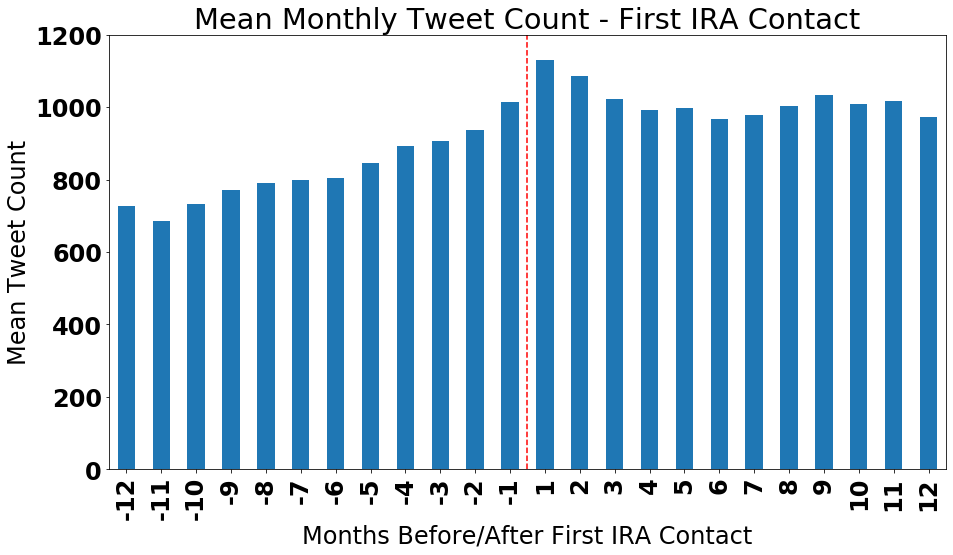

In [66]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_count.mean().plot(kind='bar', figsize=(15,8),
                            title='Mean Monthly Tweet Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfmean1_withresponse.png')
# plt.savefig('BefAfmean1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


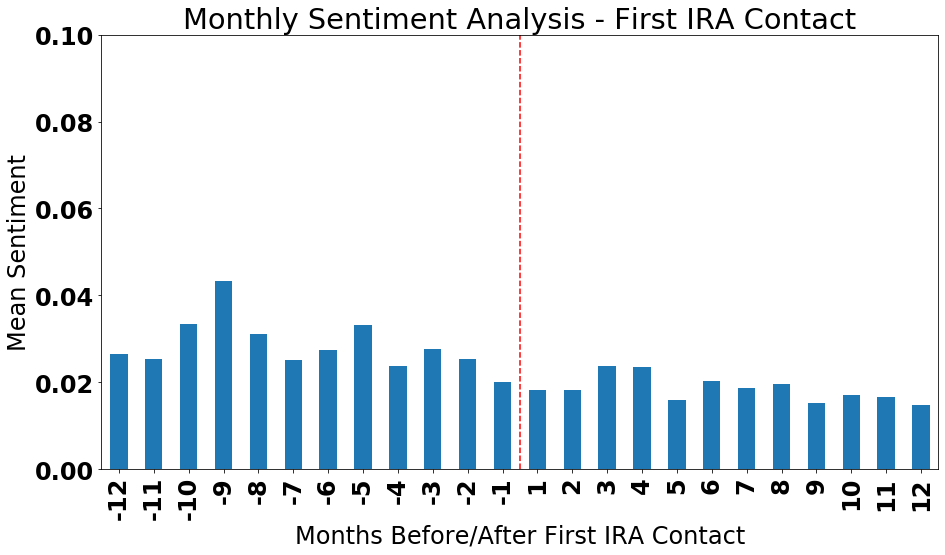

In [37]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Sentiment Analysis - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=0.10)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfsent1_withresponse.png')
# plt.savefig('BefAfsent1_noresponse.png')
plt.show()

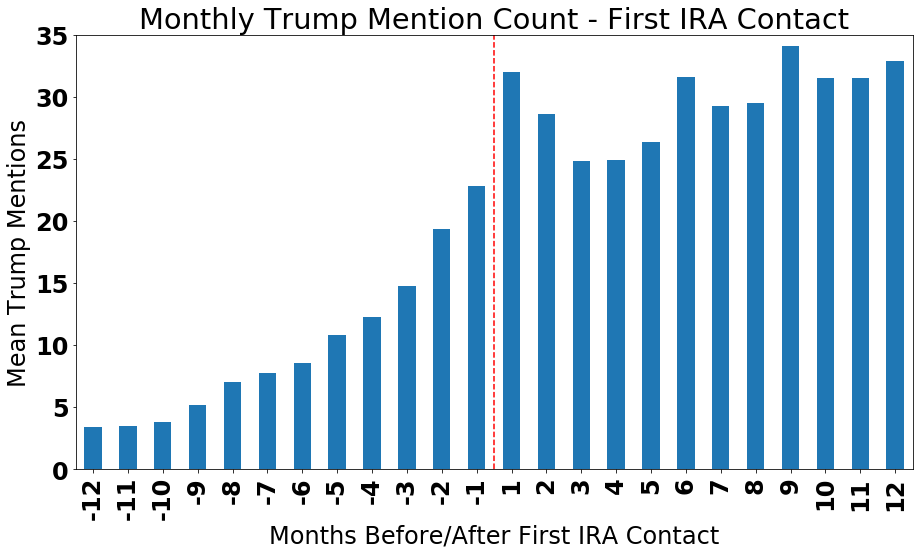

In [38]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

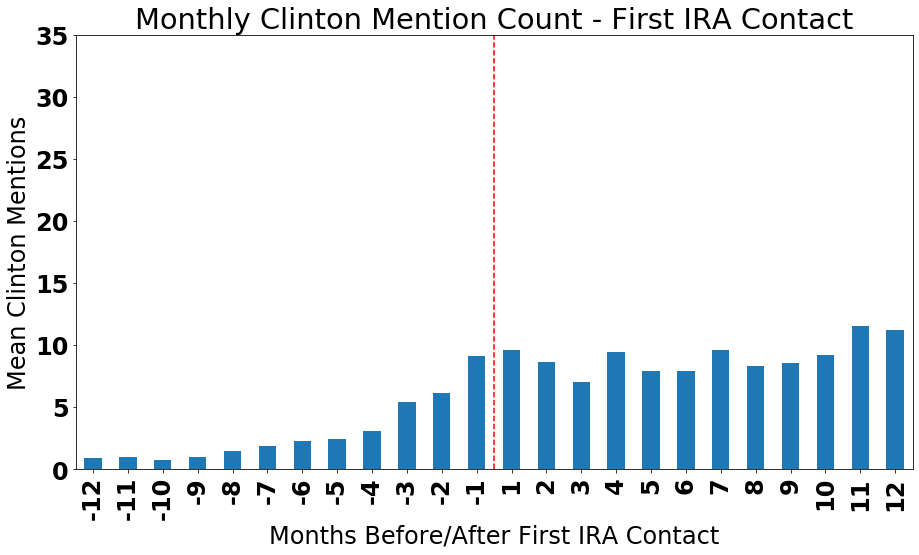

In [39]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton1_withresponse.png')
# plt.savefig('BefAfclinton1_noresponse.png')
plt.show()

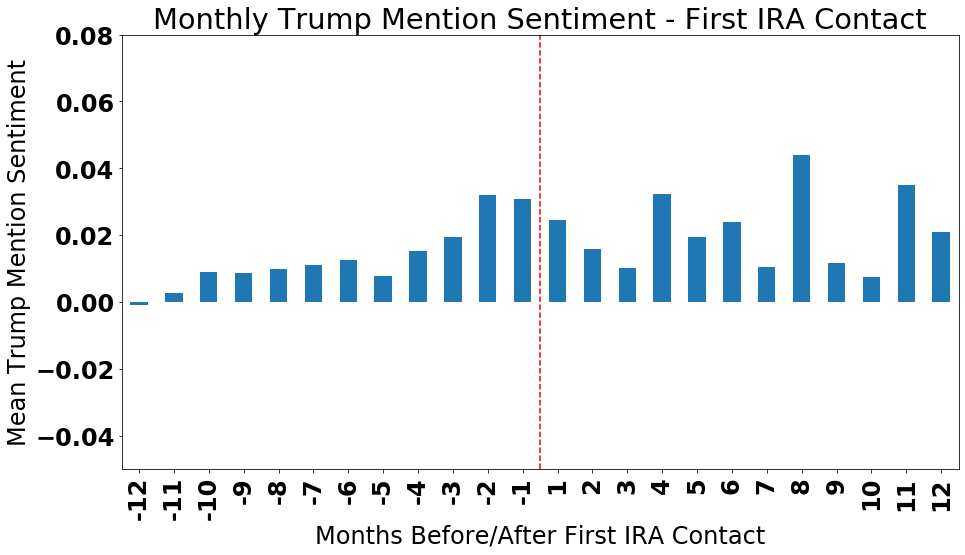

In [40]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


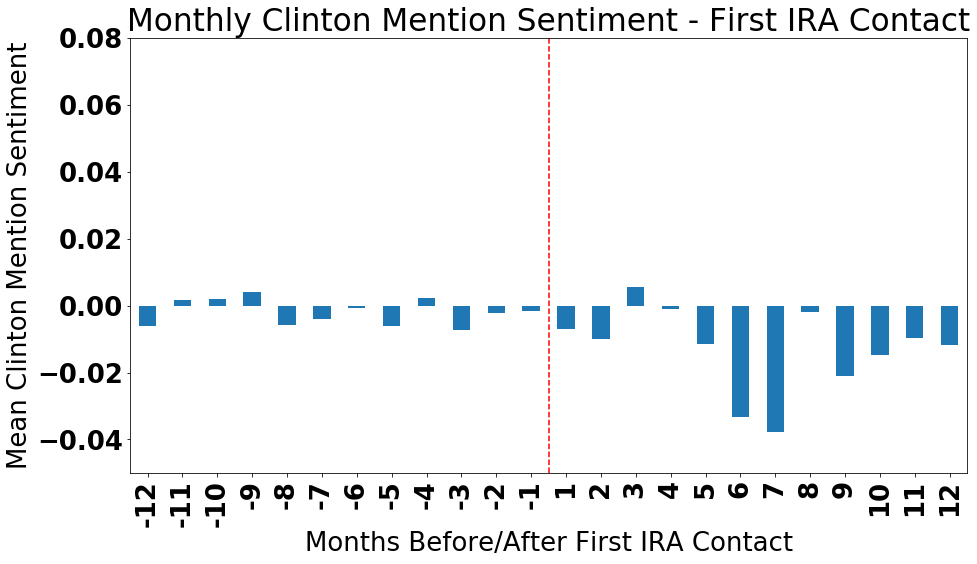

In [41]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

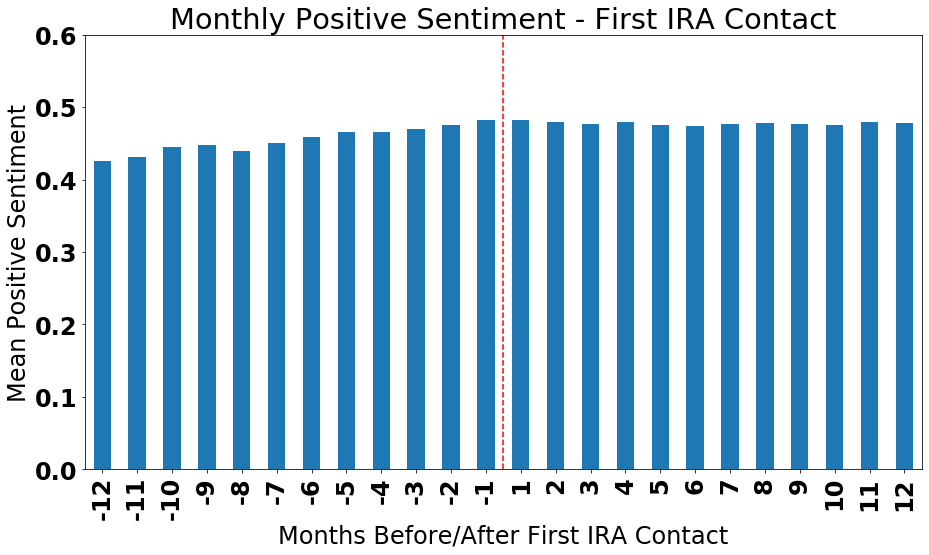

In [42]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_positive_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Positive Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfpositive_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

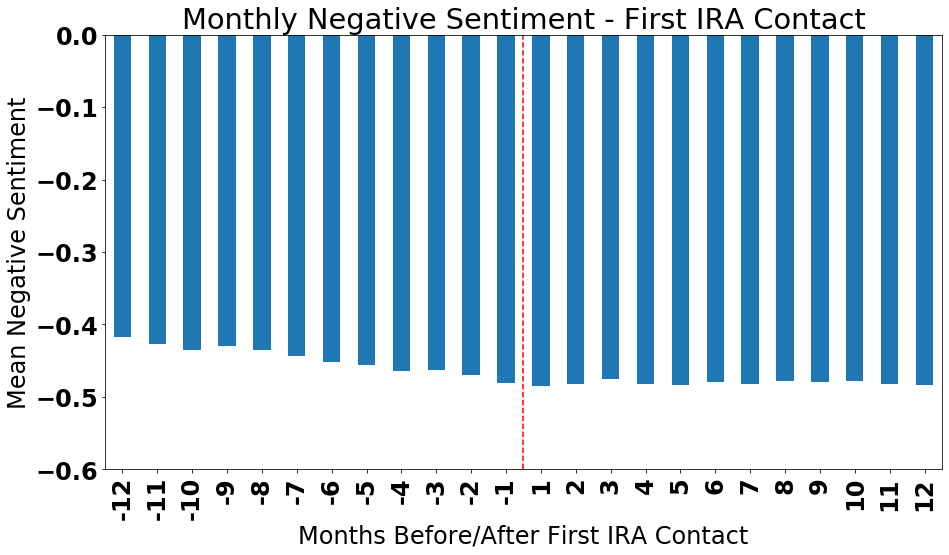

In [43]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_negative_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Negative Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Two Plots**

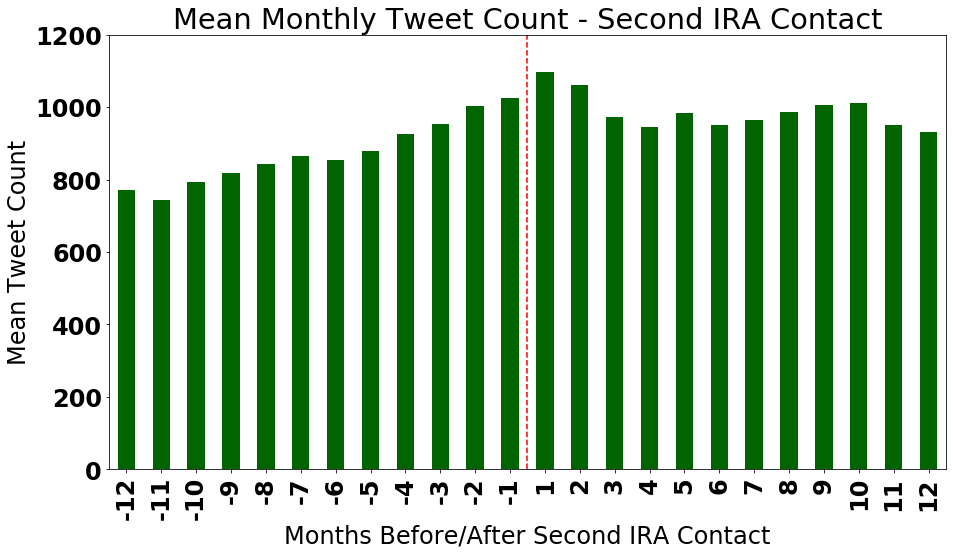

In [44]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'darkgreen',
                            title='Mean Monthly Tweet Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfmean2_withresponse.png')
# plt.savefig('BefAfmean2_noresponse.png')
plt.show()

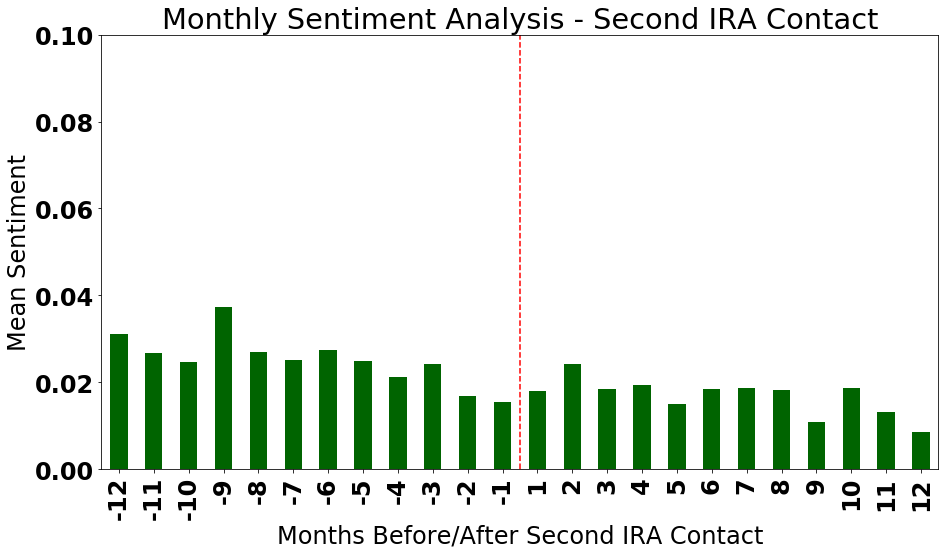

In [45]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='darkgreen',
                            title='Monthly Sentiment Analysis - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfsent2_withresponse.png')
# plt.savefig('BefAfsent2_noresponse.png')
plt.show()

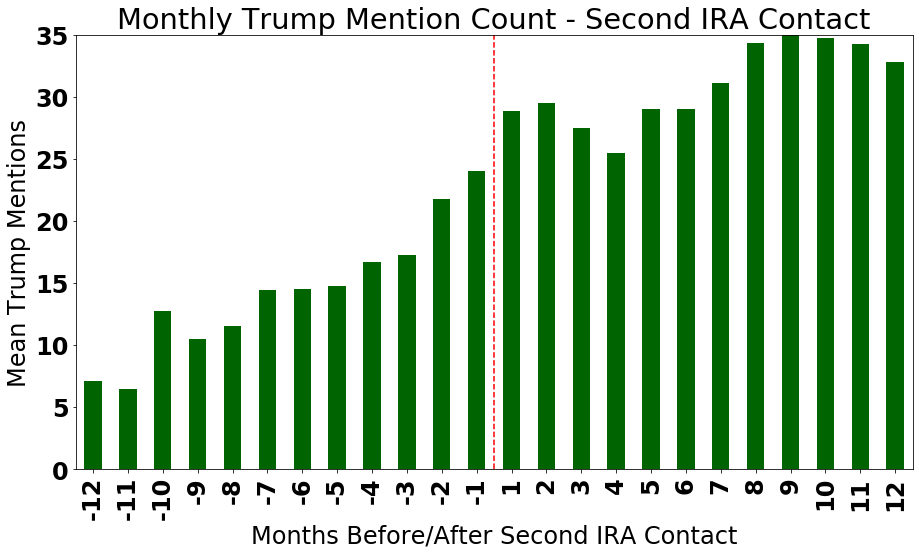

In [46]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')

plt.show()

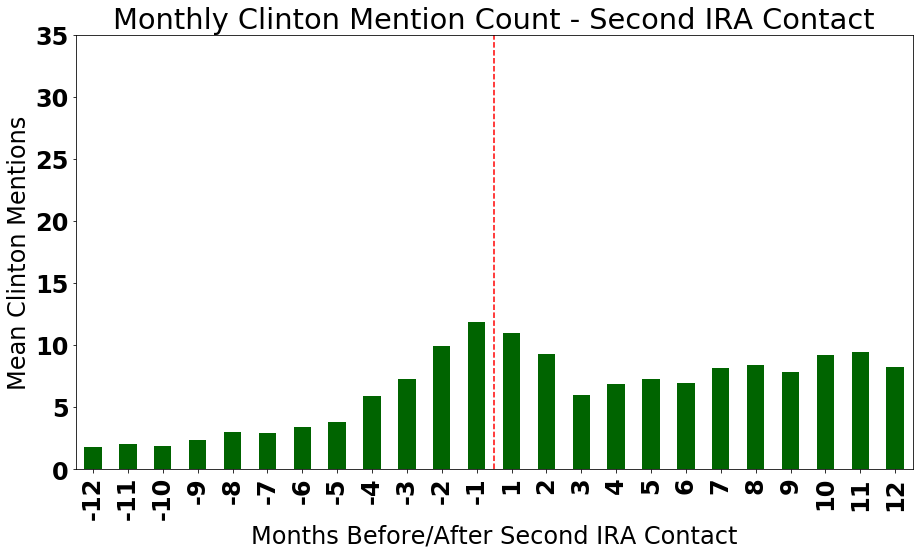

In [47]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton2_withresponse.png')
# plt.savefig('BefAfclinton2_noresponse.png')

plt.show()

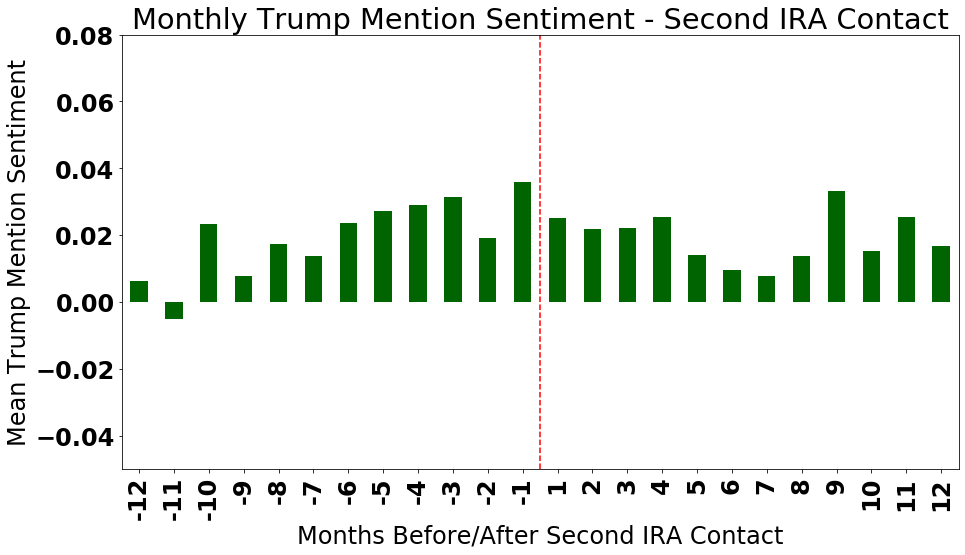

In [48]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump_sent2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

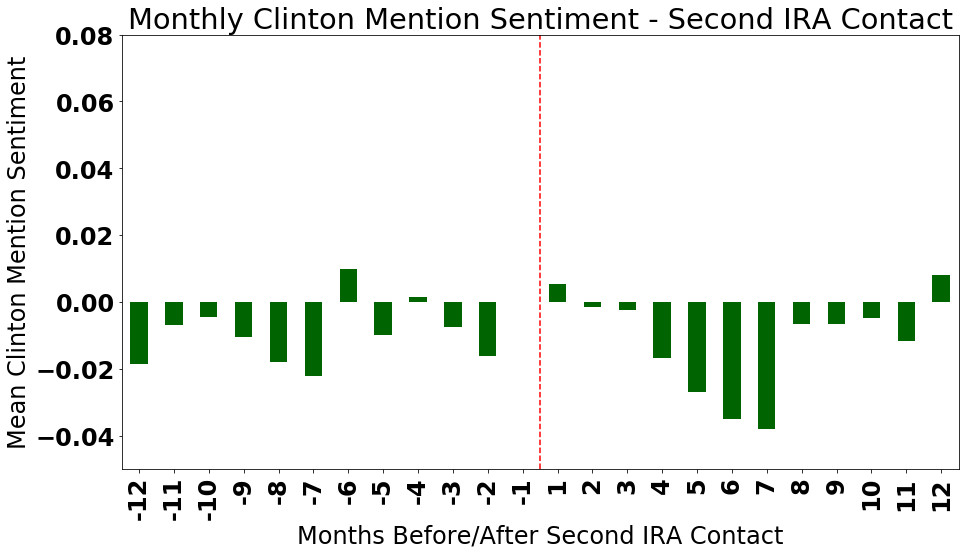

In [49]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton_sent2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

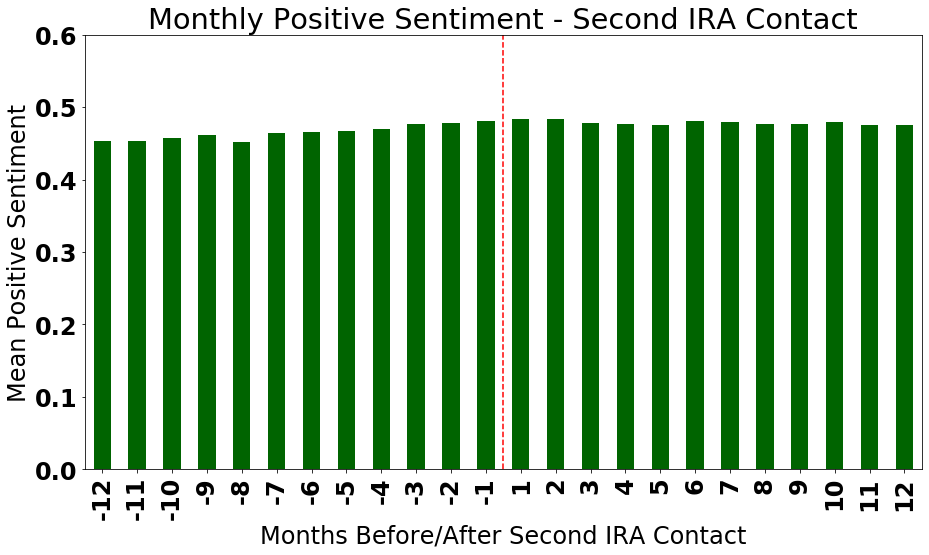

In [50]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Positive Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfpositive_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

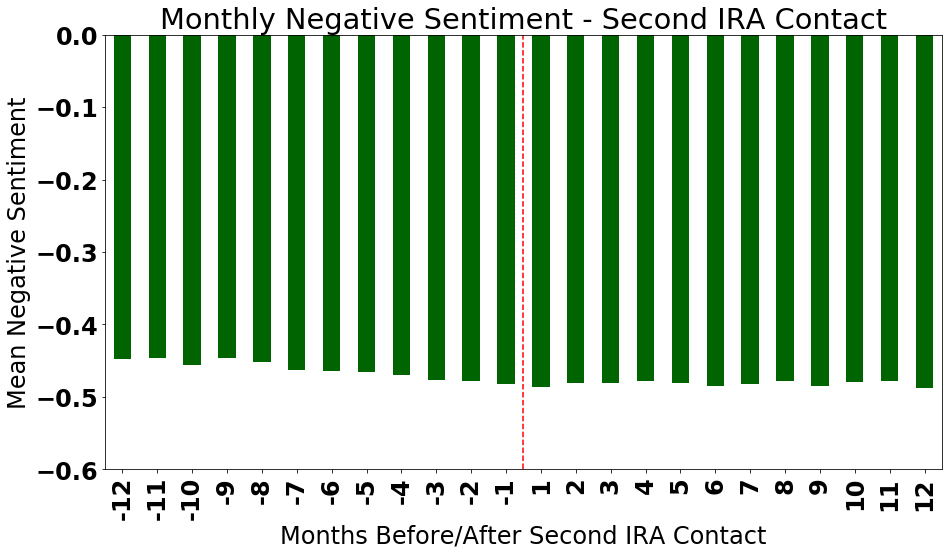

In [51]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Negative Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Three Plots**

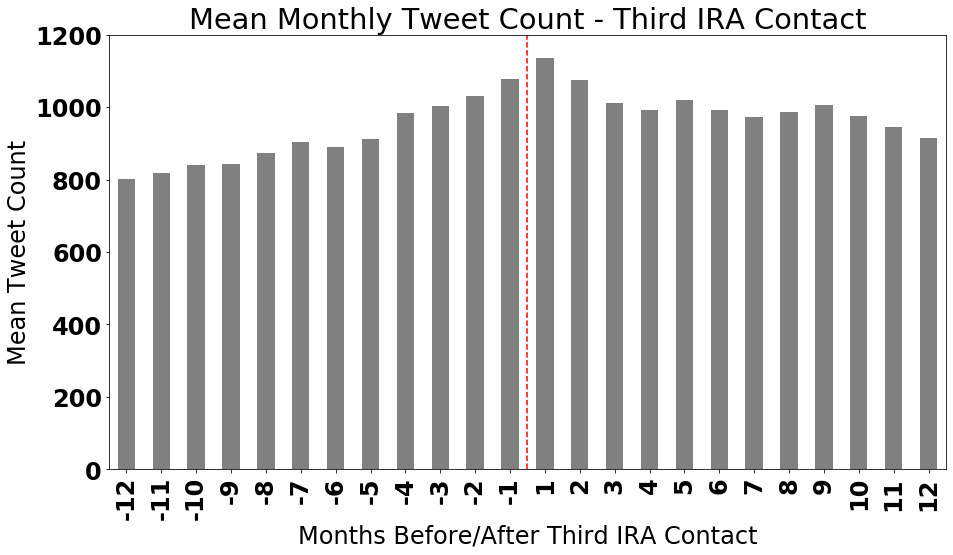

In [52]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'grey',
                            title='Mean Monthly Tweet Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfmean3_withresponse.png')
# plt.savefig('BefAfmean3_noresponse.png')

plt.show()

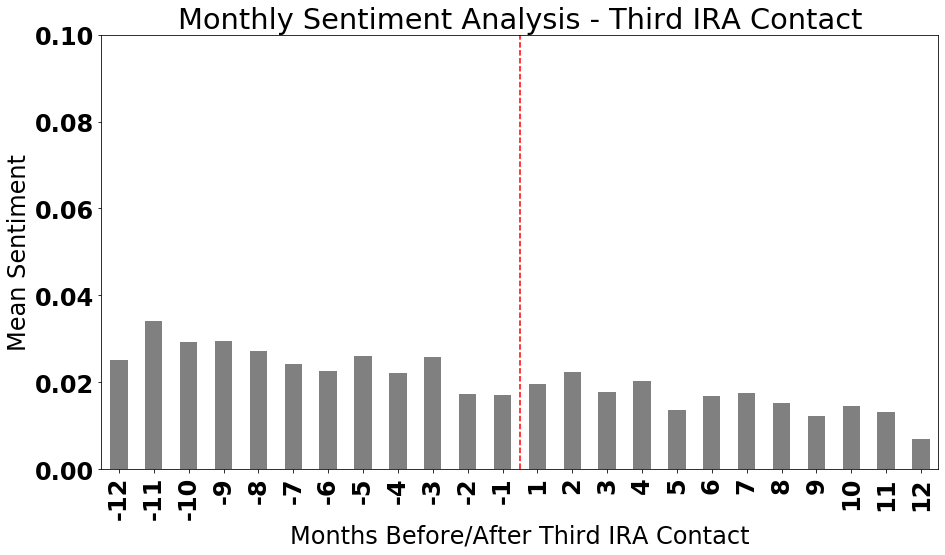

In [53]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='grey',
                            title='Monthly Sentiment Analysis - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfsent3_withresponse.png')
# plt.savefig('BefAfsent3_noresponse.png')

plt.show()

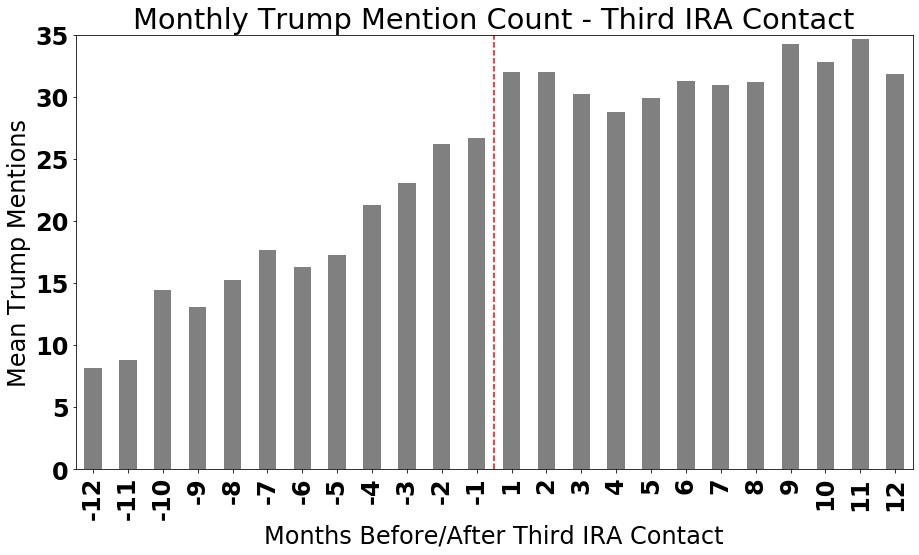

In [54]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

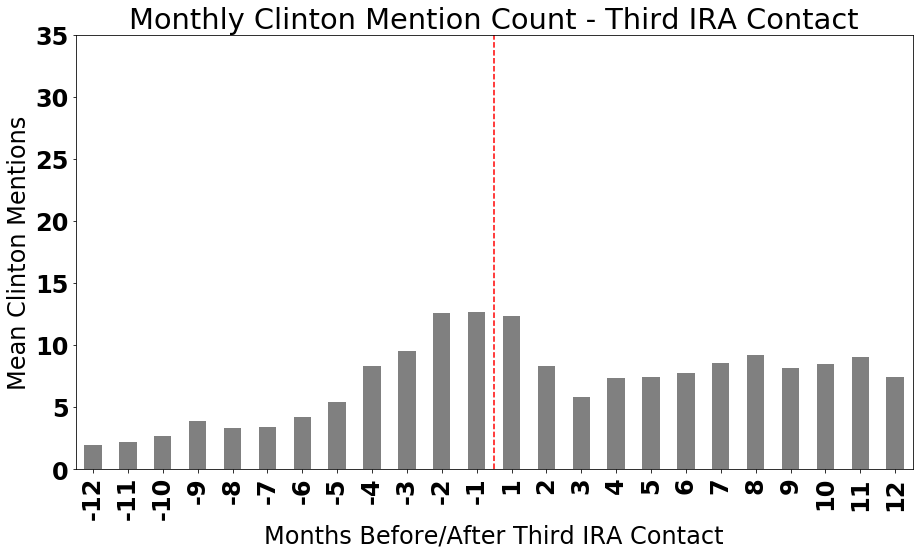

In [55]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=35)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton3_withresponse.png')
# plt.savefig('BefAfclinton3_noresponse.png')

plt.show()

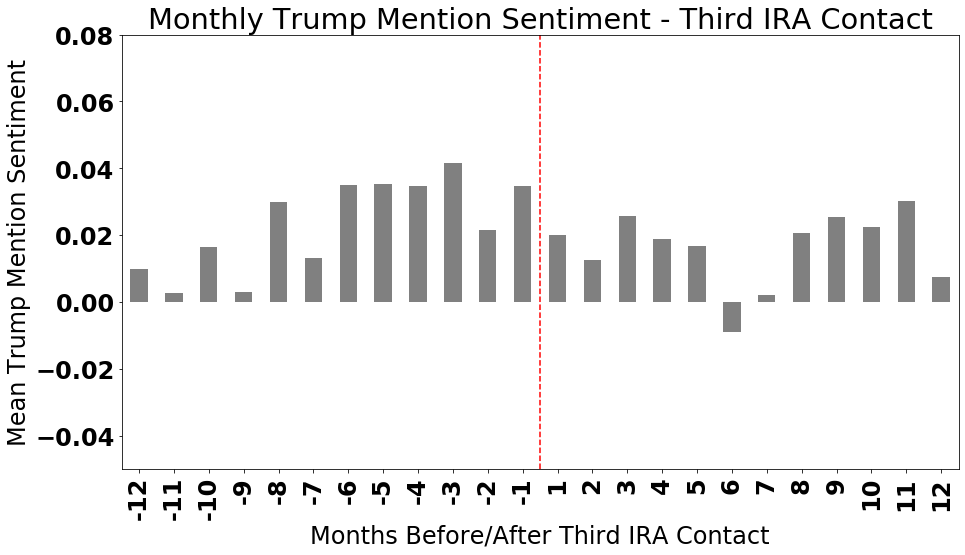

In [56]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAftrump_sent3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

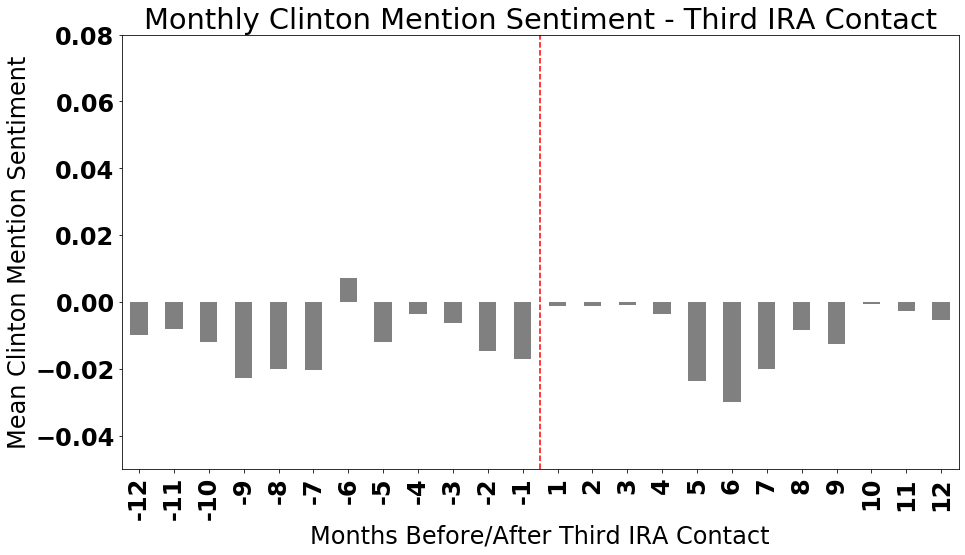

In [57]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidRespond/BefAfclinton_sent3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

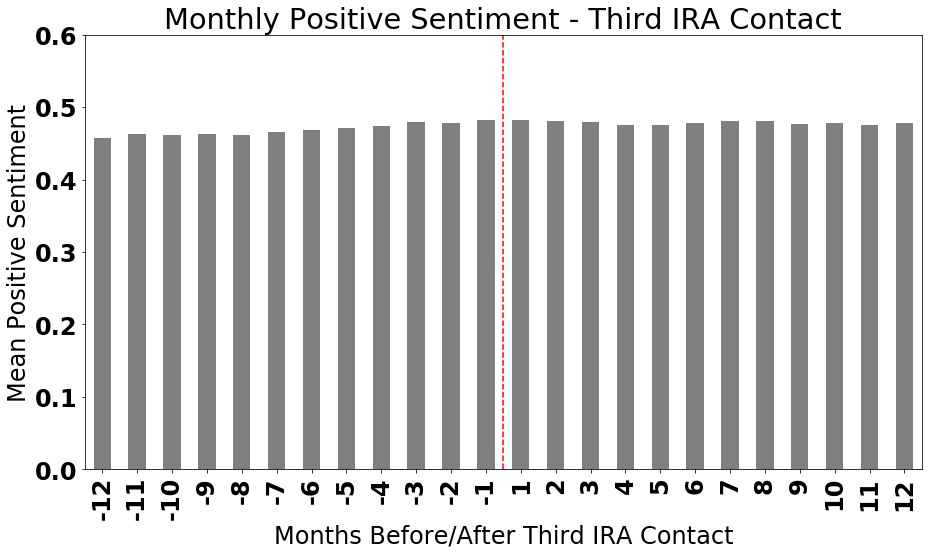

In [58]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Positive Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfpositive_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

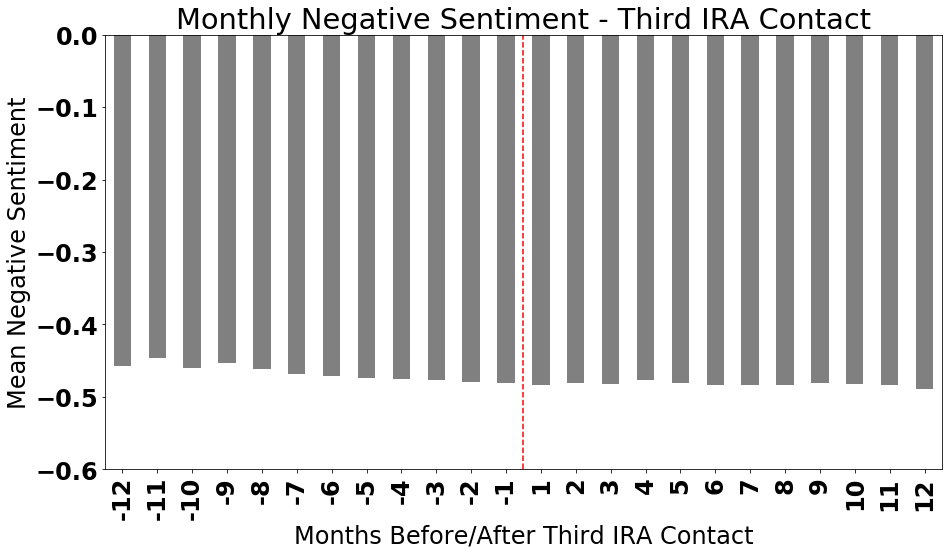

In [59]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Negative Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


In [60]:
# beforeAfterDF.head()
# befAftCounts.head()

In [61]:
# count = 0
# remove_users = []
# for i in range(len(beforeAfterDF)):
# # for i in range(10):
#     first_contact = beforeAfterDF['first_contact'][i]
#     first_tweety = dt.strptime(first_tweet_dict[beforeAfterDF['username'][i]], "%Y-%m-%d")
#     if first_tweety >= first_contact:
#         remove_users.append(beforeAfterDF['username'][i])
# #         print(beforeAfterDF['username'][i])
# #         print(first_tweety)
# #         print(first_contact)
#         count += 1
# print(count)
    

In [62]:
# removeDF = pd.DataFrame(remove_users)

In [63]:
# removeDF.columns = ['username']

In [64]:
# removeDF.head()

In [65]:
# removeDF.to_csv('removeUsers_DidNotMentionBackUsers.csv')